# Utility Cost Trends - High Electricity Cost States (IOUs)

Replication of CA electricity primer analysis for all IOUs in:
- **Maine (ME)**
- **New York (NY)**
- **Massachusetts (MA)**
- **West Virginia (WV)**
- **Maryland (MD)**

Data sources: EIA Form 861 (2005-2022), FERC Form 1

# Imports and Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import cpi
import tol_colors as tc
import numpy as np
from matplotlib.patches import Patch
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 18
cset = tc.tol_cset('bright')

In [3]:
# Target states and their IOUs
TARGET_STATES = ['ME', 'NY', 'MA', 'WV', 'MD']
STATE_NAMES = {'ME': 'Maine', 'NY': 'New York', 'MA': 'Massachusetts', 'WV': 'West Virginia', 'MD': 'Maryland'}

# Color palette for states
STATE_COLORS = {
    'ME': cset.blue,
    'NY': cset.red,
    'MA': cset.green,
    'WV': cset.yellow,
    'MD': cset.purple
}

# Output directory
os.makedirs('HighCostStates_Outputs', exist_ok=True)

# EIA Form 861 Data - Load and Process

In [4]:
cache_path = 'datafiles/Merged EIA data - high cost states IOUs.csv'

if os.path.isfile(cache_path):
    all_eia = pd.read_csv(cache_path)
    print(f'Loaded cached data: {len(all_eia)} rows')
else:
    yrs = list(range(2005, 2023))
    yr_dfs = []
    for yr in yrs:
        file = f'Sales_Ult_Cust_{yr}.xlsx'
        df = pd.read_excel(f'datafiles/EIA Data/{file}', sheet_name='States', header=2)

        # Keep only IOUs in target states
        df = df[(df['Ownership'] == 'Investor Owned') & (df['State'].isin(TARGET_STATES))]

        print(f'{yr}: {len(df)} IOU rows across {df["State"].nunique()} states')

        # Handle column name differences across years
        try:
            df = df[['Data Year', 'Utility Number', 'Utility Name', 'Service Type', 'State',
                     'Thousand Dollars.1', 'Megawatthours.1', 'Count.1',
                     'Thousand Dollars.2', 'Megawatthours.2', 'Count.2',
                     'Thousand Dollars', 'Megawatthours', 'Count']]
            cols = ['Thousand Dollars.1', 'Megawatthours.1', 'Count.1',
                    'Thousand Dollars.2', 'Megawatthours.2', 'Count.2',
                    'Thousand Dollars', 'Megawatthours', 'Count']
            df.loc[:, cols] = df[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
            df = df.rename(columns={
                'Data Year': 'Year',
                'Utility Number': 'Utility ID',
                'Thousand Dollars': 'Revenue (thousand$)_res', 'Megawatthours': 'Sales (MWh)_res', 'Count': 'Customers_res',
                'Thousand Dollars.1': 'Revenue (thousand$)_com', 'Megawatthours.1': 'Sales (MWh)_com', 'Count.1': 'Customers_com',
                'Thousand Dollars.2': 'Revenue (thousand$)_ind', 'Megawatthours.2': 'Sales (MWh)_ind', 'Count.2': 'Customers_ind'
            })
        except KeyError:
            df = df[['Data Year', 'Utility Number', 'Utility Name', 'SERVICE_TYPE', 'State',
                     'Thousands Dollars.1', 'Megawatthours.1', 'Count.1',
                     'Thousands Dollars.2', 'Megawatthours.2', 'Count.2',
                     'Thousands Dollars', 'Megawatthours', 'Count']]
            cols = ['Thousands Dollars.1', 'Megawatthours.1', 'Count.1',
                    'Thousands Dollars.2', 'Megawatthours.2', 'Count.2',
                    'Thousands Dollars', 'Megawatthours', 'Count']
            df.loc[:, cols] = df[cols].apply(pd.to_numeric, errors='coerce').fillna(0)
            df = df.rename(columns={
                'Data Year': 'Year', 'SERVICE_TYPE': 'Service Type',
                'Utility Number': 'Utility ID',
                'Thousands Dollars': 'Revenue (thousand$)_res', 'Megawatthours': 'Sales (MWh)_res', 'Count': 'Customers_res',
                'Thousands Dollars.1': 'Revenue (thousand$)_com', 'Megawatthours.1': 'Sales (MWh)_com', 'Count.1': 'Customers_com',
                'Thousands Dollars.2': 'Revenue (thousand$)_ind', 'Megawatthours.2': 'Sales (MWh)_ind', 'Count.2': 'Customers_ind'
            })

        df.reset_index(drop=True, inplace=True)
        yr_dfs.append(df)

    all_eia = pd.concat(yr_dfs, ignore_index=True)
    all_eia.to_csv(cache_path, index=False)
    print(f'\nSaved {len(all_eia)} rows to {cache_path}')

print(f'\nTotal rows: {len(all_eia)}')
print(f'States: {sorted(all_eia["State"].unique())}')
print(f'Years: {all_eia["Year"].min()}-{all_eia["Year"].max()}')
print(f'Unique IOUs: {all_eia["Utility Name"].nunique()}')

2005: 52 IOU rows across 5 states


2006: 52 IOU rows across 5 states


2007: 48 IOU rows across 5 states


2008: 44 IOU rows across 5 states


2009: 44 IOU rows across 5 states


2010: 42 IOU rows across 5 states


2011: 43 IOU rows across 5 states


2012: 43 IOU rows across 5 states


2013: 43 IOU rows across 5 states


2014: 43 IOU rows across 5 states


2015: 45 IOU rows across 5 states


2016: 44 IOU rows across 5 states


2017: 44 IOU rows across 5 states


2018: 42 IOU rows across 5 states


2019: 42 IOU rows across 5 states


2020: 42 IOU rows across 5 states


2021: 42 IOU rows across 5 states


2022: 42 IOU rows across 5 states

Saved 797 rows to datafiles/Merged EIA data - high cost states IOUs.csv

Total rows: 797
States: ['MA', 'MD', 'ME', 'NY', 'WV']
Years: 2005-2022
Unique IOUs: 48


In [5]:
# List all IOUs by state in the latest year
latest = all_eia[all_eia['Year'] == all_eia['Year'].max()]
for st in TARGET_STATES:
    st_data = latest[latest['State'] == st]
    print(f'\n=== {STATE_NAMES[st]} ({st}) ===')
    for name in sorted(st_data['Utility Name'].unique()):
        util_data = st_data[st_data['Utility Name'] == name]
        svc_types = util_data['Service Type'].unique()
        # Sum across service types for total bundled customers
        bundled = util_data[util_data['Service Type'] == 'Bundled']
        res_cust = bundled['Customers_res'].sum() if len(bundled) > 0 else 0
        print(f'  {name}: {res_cust:,.0f} res customers, services: {list(svc_types)}')


=== Maine (ME) ===
  Central Maine Power Co: 512,210 res customers, services: ['Bundled', 'Delivery']
  Versant Power: 129,433 res customers, services: ['Bundled', 'Delivery']

=== New York (NY) ===
  Central Hudson Gas & Elec Corp: 233,720 res customers, services: ['Bundled', 'Delivery']
  Consolidated Edison Co-NY Inc: 2,609,391 res customers, services: ['Bundled', 'Delivery']
  Fishers Island Utility Co Inc: 646 res customers, services: ['Bundled']
  New York State Elec & Gas Corp: 700,370 res customers, services: ['Bundled', 'Delivery']
  Niagara Mohawk Power Corp.: 1,379,221 res customers, services: ['Bundled', 'Delivery']
  Orange & Rockland Utils Inc: 152,372 res customers, services: ['Bundled', 'Delivery']
  Pennsylvania Electric Co: 3,304 res customers, services: ['Bundled', 'Delivery']
  Rochester Gas & Electric Corp: 276,292 res customers, services: ['Bundled', 'Delivery']

=== Massachusetts (MA) ===
  Fitchburg Gas & Elec Light Co: 18,525 res customers, services: ['Bundled

# Figure 1: 2022 Snapshot - IOUs by State
Customers, Sales, and Revenue for all IOUs in the 5 target states

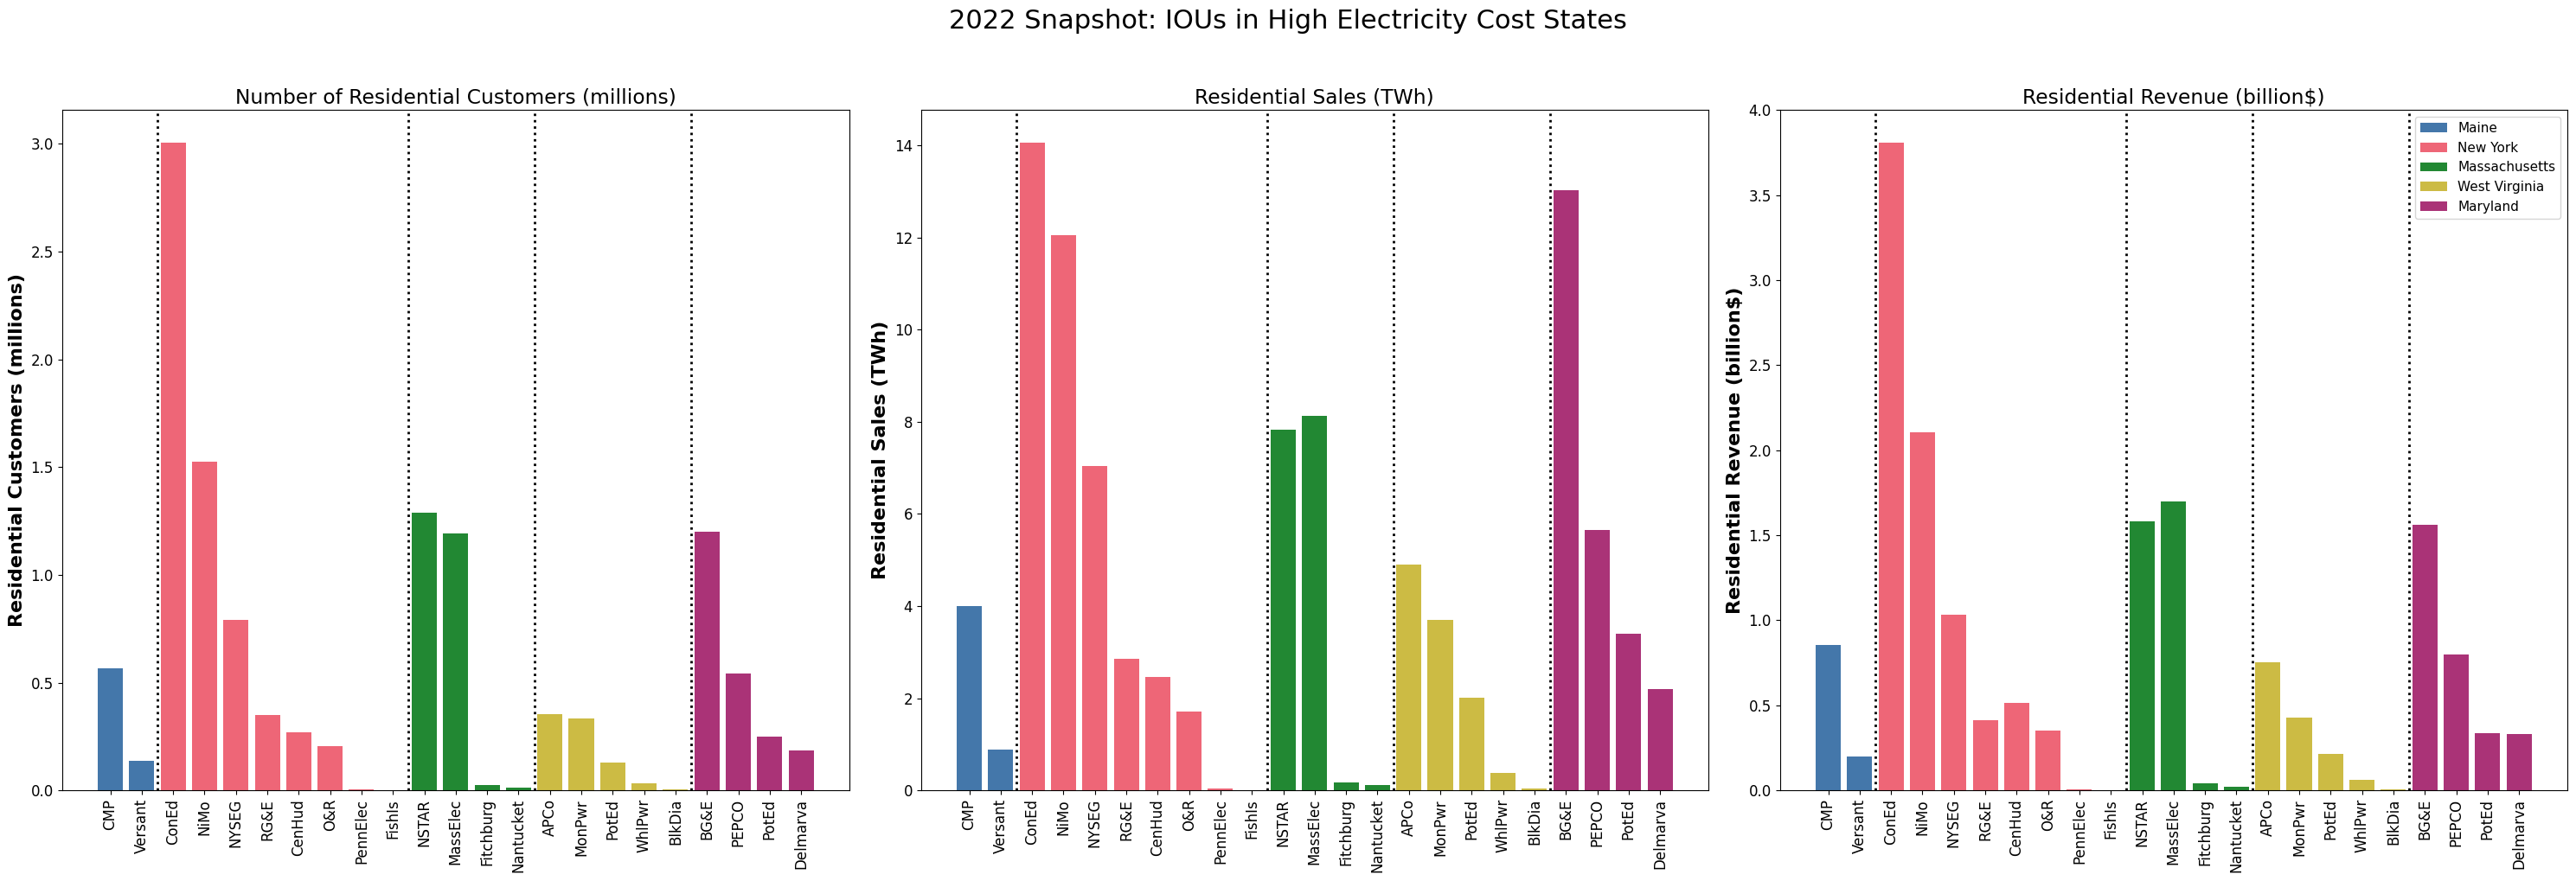

In [6]:
latest_year = all_eia[all_eia['Year'] == 2022].copy()

# Abbreviate utility names for plotting
name_abbrev = {
    # Maine
    'Central Maine Power Co': 'CMP',
    'Versant Power': 'Versant',
    # New York
    'Consolidated Edison Co-NY Inc': 'ConEd',
    'Central Hudson Gas & Elec Corp': 'CenHud',
    'New York State Elec & Gas Corp': 'NYSEG',
    'Niagara Mohawk Power Corp.': 'NiMo',
    'Orange & Rockland Utils Inc': 'O&R',
    'Rochester Gas & Electric Corp': 'RG&E',
    'Fishers Island Utility Co Inc': 'FishIs',
    'Pennsylvania Electric Co': 'PennElec',
    # Massachusetts
    'NSTAR Electric Company': 'NSTAR',
    'Massachusetts Electric Co': 'MassElec',
    'Fitchburg Gas & Elec Light Co': 'Fitchburg',
    'Nantucket Electric Co': 'Nantucket',
    # West Virginia
    'Appalachian Power Co': 'APCo',
    'Monongahela Power Co': 'MonPwr',
    'The Potomac Edison Company': 'PotEd',
    'Wheeling Power Co': 'WhlPwr',
    'Black Diamond Power Co': 'BlkDia',
    # Maryland
    'Baltimore Gas & Electric Co': 'BG&E',
    'Potomac Electric Power Co': 'PEPCO',
    'Delmarva Power': 'Delmarva',
}
latest_year['Short Name'] = latest_year['Utility Name'].map(name_abbrev).fillna(latest_year['Utility Name'])

# For states with delivery+bundled, combine into total for snapshot
# Group by utility and state, summing bundled+delivery
snapshot = latest_year.groupby(['State', 'Utility Name', 'Short Name']).agg({
    'Customers_res': 'sum', 'Customers_com': 'sum', 'Customers_ind': 'sum',
    'Sales (MWh)_res': 'sum', 'Sales (MWh)_com': 'sum', 'Sales (MWh)_ind': 'sum',
    'Revenue (thousand$)_res': 'sum', 'Revenue (thousand$)_com': 'sum', 'Revenue (thousand$)_ind': 'sum'
}).reset_index()

# Sort by state then by residential customers within state
snapshot['state_order'] = snapshot['State'].map({s: i for i, s in enumerate(TARGET_STATES)})
snapshot = snapshot.sort_values(['state_order', 'Customers_res'], ascending=[True, False]).reset_index(drop=True)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))

x = np.arange(len(snapshot))
colors = [STATE_COLORS[s] for s in snapshot['State']]

# Panel 1: Customers
axs[0].bar(x, snapshot['Customers_res'] / 1e6, color=colors)
axs[0].set_xticks(x)
axs[0].set_xticklabels(snapshot['Short Name'], rotation=90)
axs[0].set_ylabel('Residential Customers (millions)')
axs[0].set_title('Number of Residential Customers (millions)')

# Panel 2: Sales
axs[1].bar(x, snapshot['Sales (MWh)_res'] / 1e6, color=colors)
axs[1].set_xticks(x)
axs[1].set_xticklabels(snapshot['Short Name'], rotation=90)
axs[1].set_ylabel('Residential Sales (TWh)')
axs[1].set_title('Residential Sales (TWh)')

# Panel 3: Revenue
axs[2].bar(x, snapshot['Revenue (thousand$)_res'] / 1e6, color=colors)
axs[2].set_xticks(x)
axs[2].set_xticklabels(snapshot['Short Name'], rotation=90)
axs[2].set_ylabel('Residential Revenue (billion$)')
axs[2].set_title('Residential Revenue (billion$)')

# Add state divider lines
prev_state = None
for i, state in enumerate(snapshot['State']):
    if prev_state is not None and state != prev_state:
        for ax in axs:
            ax.axvline(x=i - 0.5, color='k', linestyle='dotted', linewidth=2)
    prev_state = state

# Legend
legend_elements = [Patch(facecolor=STATE_COLORS[s], label=STATE_NAMES[s]) for s in TARGET_STATES]
axs[2].legend(handles=legend_elements, loc='upper right')

plt.suptitle('2022 Snapshot: IOUs in High Electricity Cost States', fontsize=22, y=1.02)
plt.tight_layout()
fig.savefig('HighCostStates_Outputs/Fig1_2022_Snapshot.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 2: Time Series - IOU Trends by State (2005-2022)
Aggregate all IOUs within each state to show state-level trends

In [7]:
# Aggregate all IOUs per state per year (sum Bundled service type only for customer counts)
# For states with delivery/energy split, use Bundled to avoid double-counting customers
bundled_eia = all_eia[all_eia['Service Type'] == 'Bundled'].copy()
state_ts = bundled_eia.groupby(['State', 'Year']).agg({
    'Customers_res': 'sum', 'Customers_com': 'sum', 'Customers_ind': 'sum',
    'Sales (MWh)_res': 'sum', 'Sales (MWh)_com': 'sum', 'Sales (MWh)_ind': 'sum',
    'Revenue (thousand$)_res': 'sum', 'Revenue (thousand$)_com': 'sum', 'Revenue (thousand$)_ind': 'sum'
}).reset_index()

# Also get total (bundled+delivery) for revenue and sales (to capture full picture)
state_ts_total = all_eia.groupby(['State', 'Year']).agg({
    'Sales (MWh)_res': 'sum', 'Sales (MWh)_com': 'sum', 'Sales (MWh)_ind': 'sum',
    'Revenue (thousand$)_res': 'sum', 'Revenue (thousand$)_com': 'sum', 'Revenue (thousand$)_ind': 'sum'
}).reset_index()

# Inflate revenue to 2022$ - build a year->multiplier lookup for speed
cpi_multipliers = {}
for yr in state_ts_total['Year'].unique():
    cpi_multipliers[yr] = cpi.inflate(1.0, int(yr), to=2022)

for suffix in ['_res', '_com', '_ind']:
    col = f'Revenue (thousand$){suffix}'
    state_ts_total[f'real_{col}'] = state_ts_total.apply(
        lambda x: x[col] * cpi_multipliers[x['Year']], axis=1
    )

print('State time series ready.')
print(f'Years: {state_ts_total["Year"].min()}-{state_ts_total["Year"].max()}')

State time series ready.
Years: 2005-2022


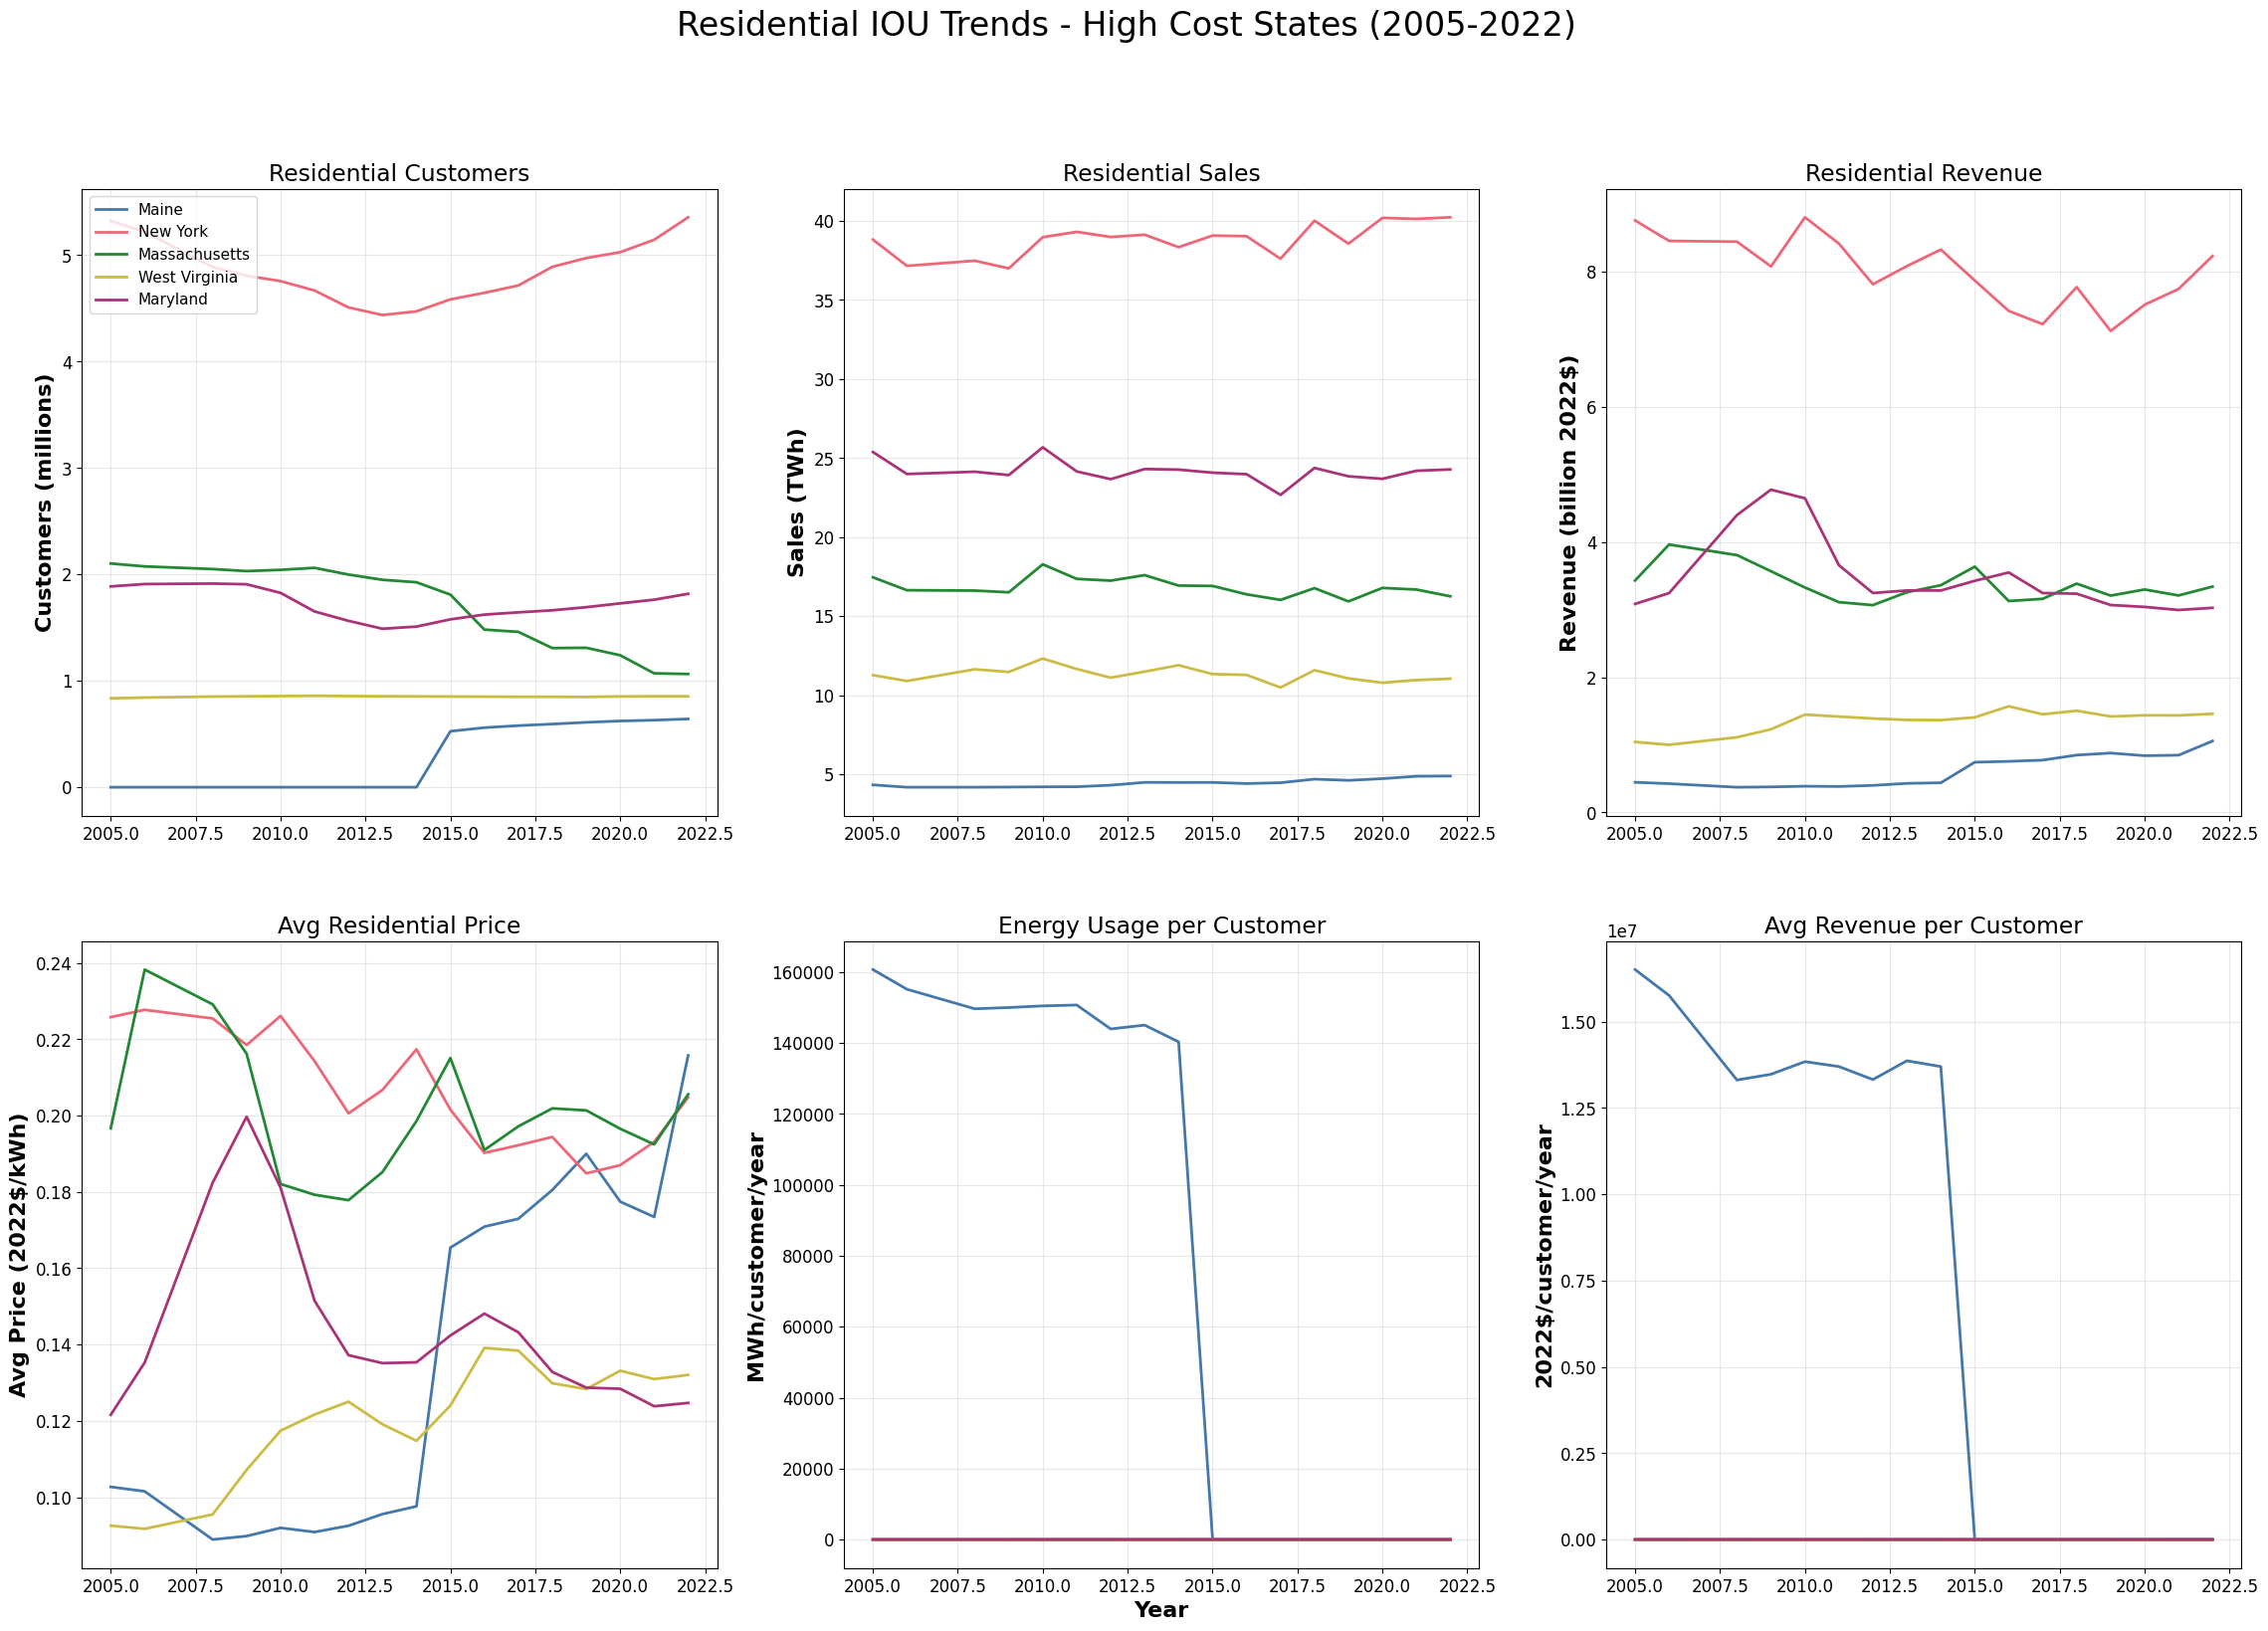

In [8]:
# Residential time series - 6 panel figure
# Merge bundled (for customer counts) with total (for sales/revenue) to ensure alignment
state_merged = pd.merge(
    state_ts[['State', 'Year', 'Customers_res', 'Customers_com', 'Customers_ind']],
    state_ts_total,
    on=['State', 'Year'],
    how='inner'
)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(28, 18))
for ax in axs.flatten():
    ax.grid(visible=True, alpha=0.3)

for st in TARGET_STATES:
    st_data = state_merged[state_merged['State'] == st]
    label = STATE_NAMES[st]
    color = STATE_COLORS[st]

    # Row 1: Customers, Sales, Revenue
    axs[0, 0].plot(st_data['Year'], st_data['Customers_res'] / 1e6, label=label, color=color, linewidth=2)
    axs[0, 1].plot(st_data['Year'], st_data['Sales (MWh)_res'] / 1e6, label=label, color=color, linewidth=2)
    axs[0, 2].plot(st_data['Year'], st_data['real_Revenue (thousand$)_res'] / 1e6, label=label, color=color, linewidth=2)

    # Row 2: Avg Price, Energy/Customer, Revenue/Customer
    avg_price = (st_data['real_Revenue (thousand$)_res'] * 1e3) / (st_data['Sales (MWh)_res'] * 1e3)  # $/kWh
    axs[1, 0].plot(st_data['Year'], avg_price, label=label, color=color, linewidth=2)

    energy_per_cust = st_data['Sales (MWh)_res'] / st_data['Customers_res']
    axs[1, 1].plot(st_data['Year'], energy_per_cust, label=label, color=color, linewidth=2)

    rev_per_cust = (st_data['real_Revenue (thousand$)_res'] * 1e3) / st_data['Customers_res']  # $/customer
    axs[1, 2].plot(st_data['Year'], rev_per_cust, label=label, color=color, linewidth=2)

axs[0, 0].set_ylabel('Customers (millions)')
axs[0, 0].set_title('Residential Customers')
axs[0, 1].set_ylabel('Sales (TWh)')
axs[0, 1].set_title('Residential Sales')
axs[0, 2].set_ylabel('Revenue (billion 2022$)')
axs[0, 2].set_title('Residential Revenue')
axs[1, 0].set_ylabel('Avg Price (2022$/kWh)')
axs[1, 0].set_title('Avg Residential Price')
axs[1, 1].set_ylabel('MWh/customer/year')
axs[1, 1].set_title('Energy Usage per Customer')
axs[1, 2].set_ylabel('2022$/customer/year')
axs[1, 2].set_title('Avg Revenue per Customer')

axs[0, 0].legend(loc='upper left')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Year')
plt.suptitle('Residential IOU Trends - High Cost States (2005-2022)', fontsize=24, y=0.98)

fig.savefig('HighCostStates_Outputs/Fig2_Residential_TimeSeries.png', dpi=300, bbox_inches='tight')
plt.show()

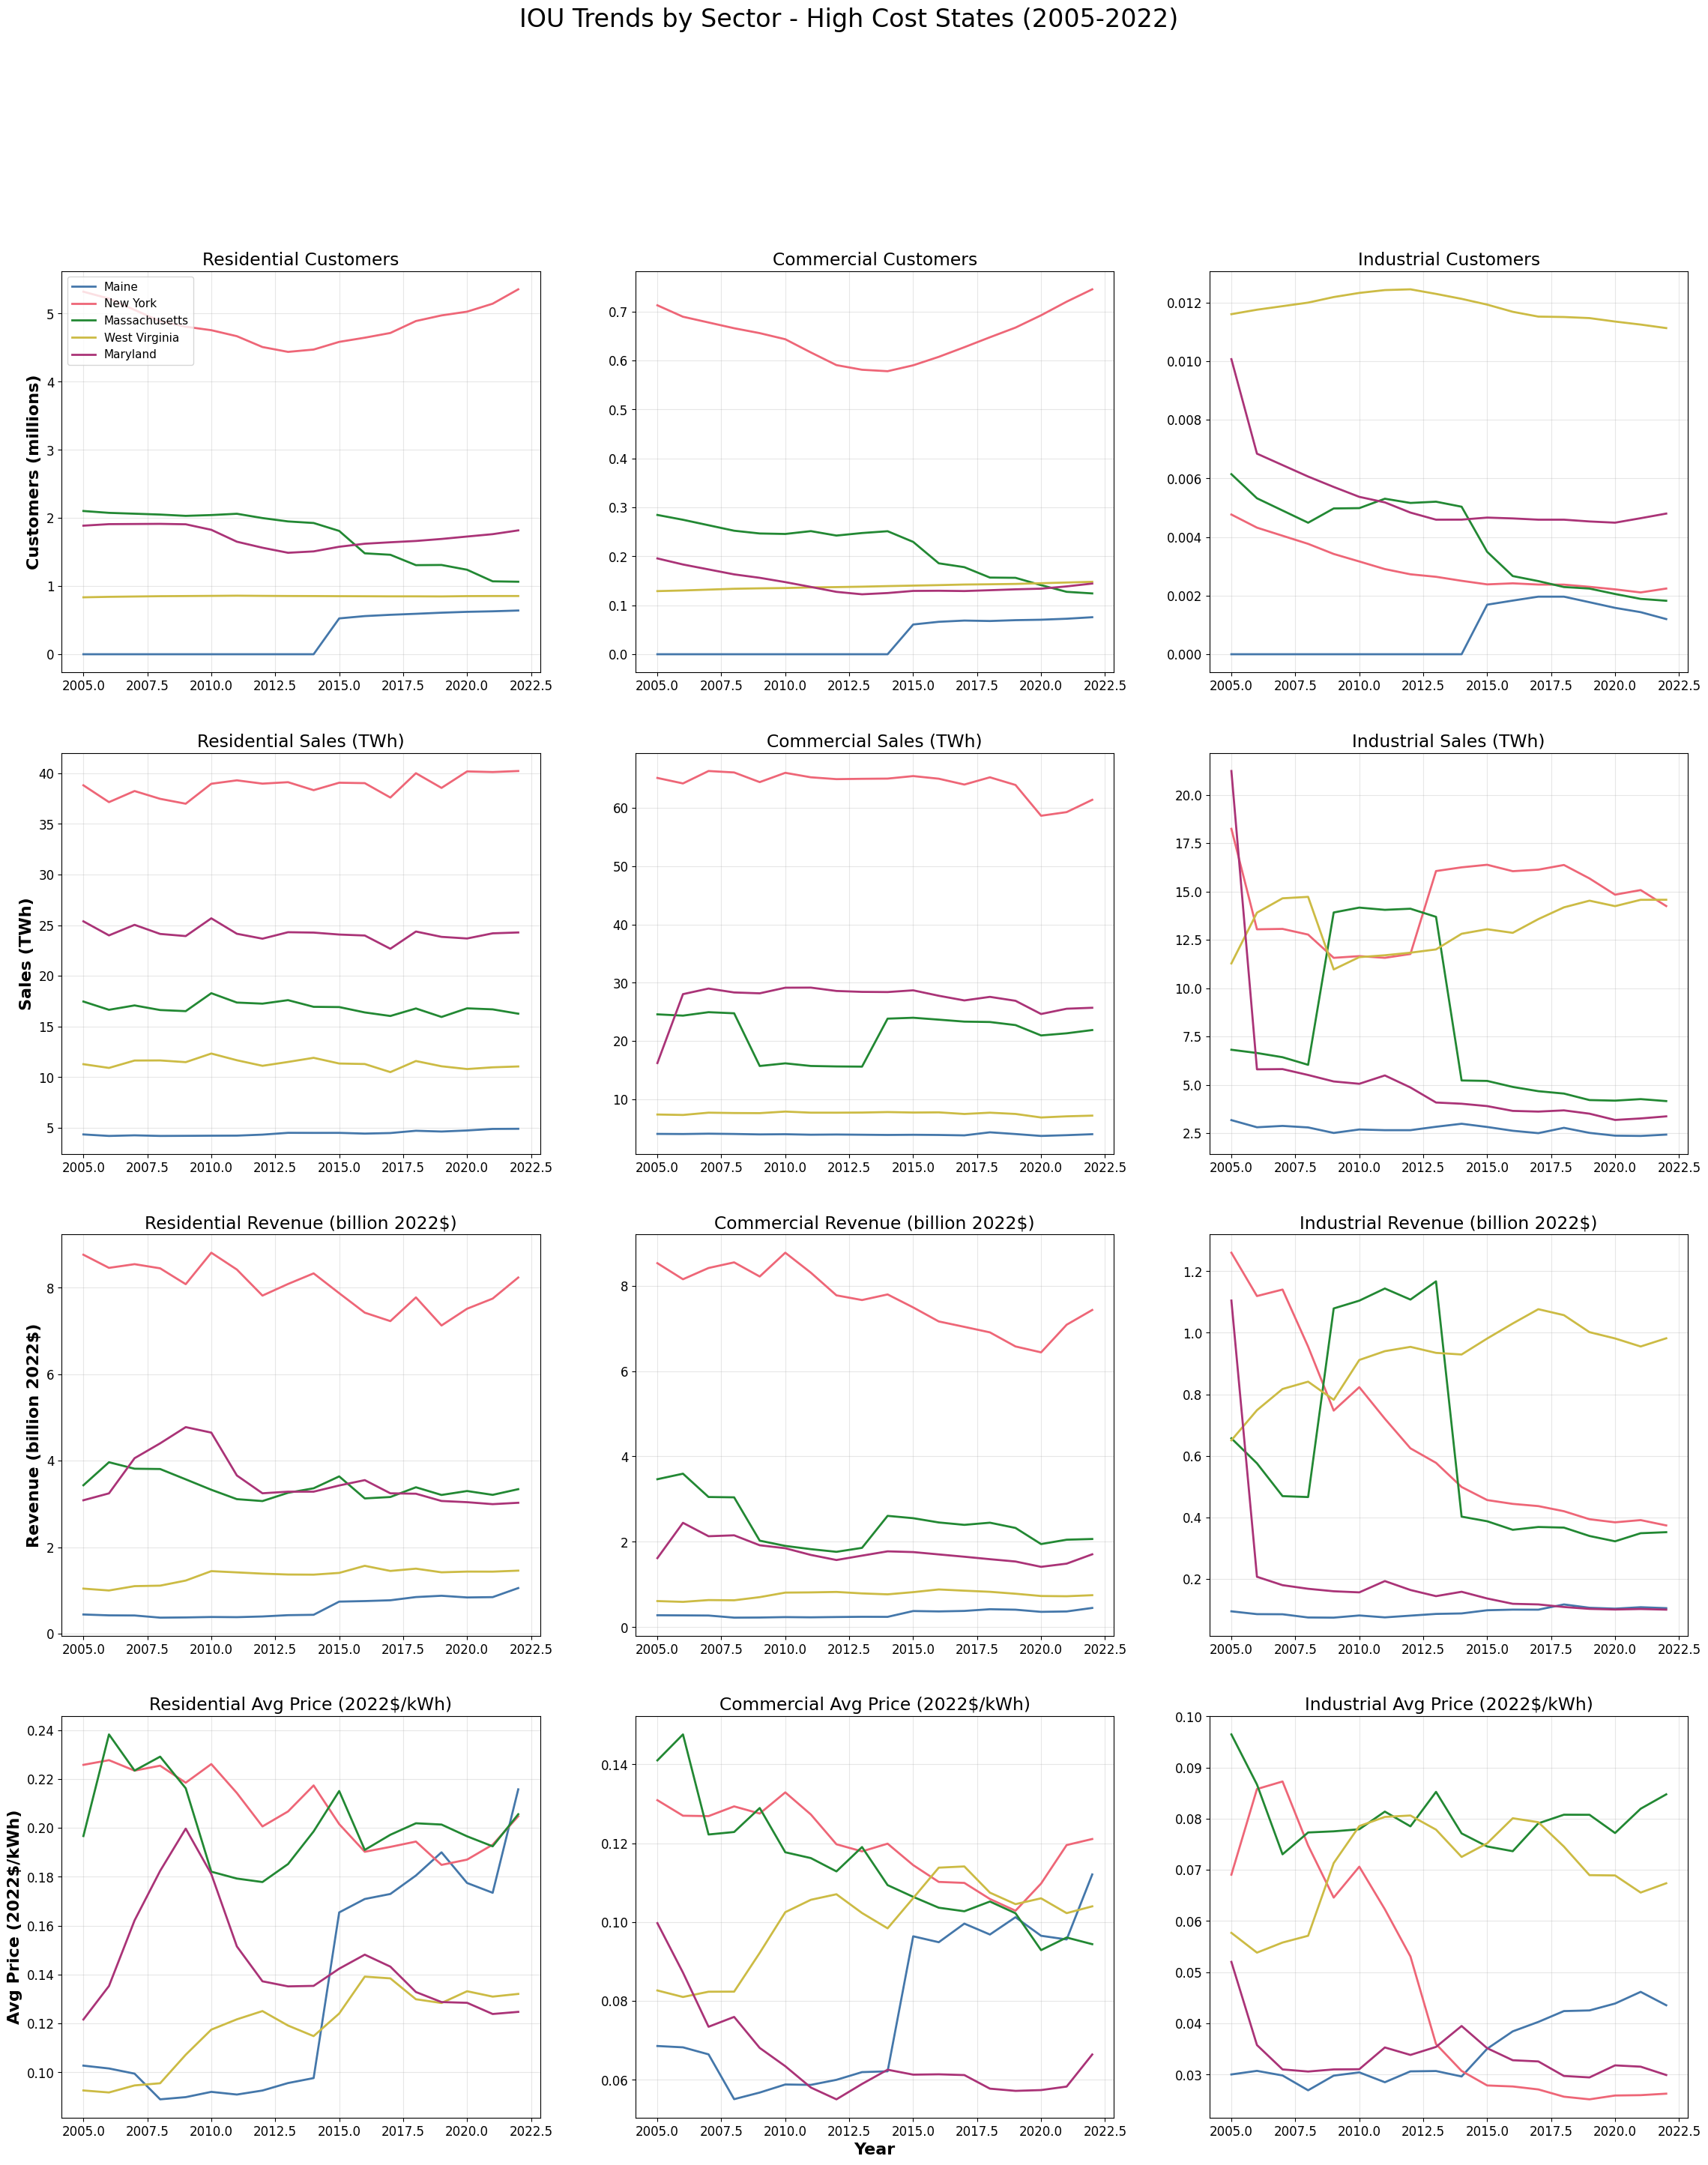

In [9]:
# All sectors time series: 4 rows (customers, sales, revenue, avg price) x 3 cols (res, com, ind)
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(28, 32))
for ax in axs.flatten():
    ax.grid(visible=True, alpha=0.3)

for st in TARGET_STATES:
    st_data = state_merged[state_merged['State'] == st]
    st_total = state_ts_total[state_ts_total['State'] == st]
    label = STATE_NAMES[st]
    color = STATE_COLORS[st]

    for col_idx, suffix in enumerate(['_res', '_com', '_ind']):
        sector = {'_res': 'Residential', '_com': 'Commercial', '_ind': 'Industrial'}[suffix]

        # Row 0: Customers (from bundled, via merged df)
        axs[0, col_idx].plot(st_data['Year'], st_data[f'Customers{suffix}'] / 1e6,
                             label=label, color=color, linewidth=2)
        axs[0, col_idx].set_title(f'{sector} Customers')

        # Row 1: Sales (total)
        axs[1, col_idx].plot(st_total['Year'], st_total[f'Sales (MWh){suffix}'] / 1e6,
                             label=label, color=color, linewidth=2)
        axs[1, col_idx].set_title(f'{sector} Sales (TWh)')

        # Row 2: Revenue (total, inflation-adjusted)
        axs[2, col_idx].plot(st_total['Year'], st_total[f'real_Revenue (thousand$){suffix}'] / 1e6,
                             label=label, color=color, linewidth=2)
        axs[2, col_idx].set_title(f'{sector} Revenue (billion 2022$)')

        # Row 3: Avg Price (total revenue / total sales)
        avg_price = (st_total[f'real_Revenue (thousand$){suffix}'] * 1e3) / (st_total[f'Sales (MWh){suffix}'] * 1e3)
        axs[3, col_idx].plot(st_total['Year'], avg_price,
                             label=label, color=color, linewidth=2)
        axs[3, col_idx].set_title(f'{sector} Avg Price (2022$/kWh)')

# Y-axis labels
axs[0, 0].set_ylabel('Customers (millions)')
axs[1, 0].set_ylabel('Sales (TWh)')
axs[2, 0].set_ylabel('Revenue (billion 2022$)')
axs[3, 0].set_ylabel('Avg Price (2022$/kWh)')

axs[0, 0].legend(loc='upper left')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Year')
plt.suptitle('IOU Trends by Sector - High Cost States (2005-2022)', fontsize=24, y=0.99)

fig.savefig('HighCostStates_Outputs/Fig2_AllSectors_TimeSeries.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 2b: Per-Utility Time Series within Each State

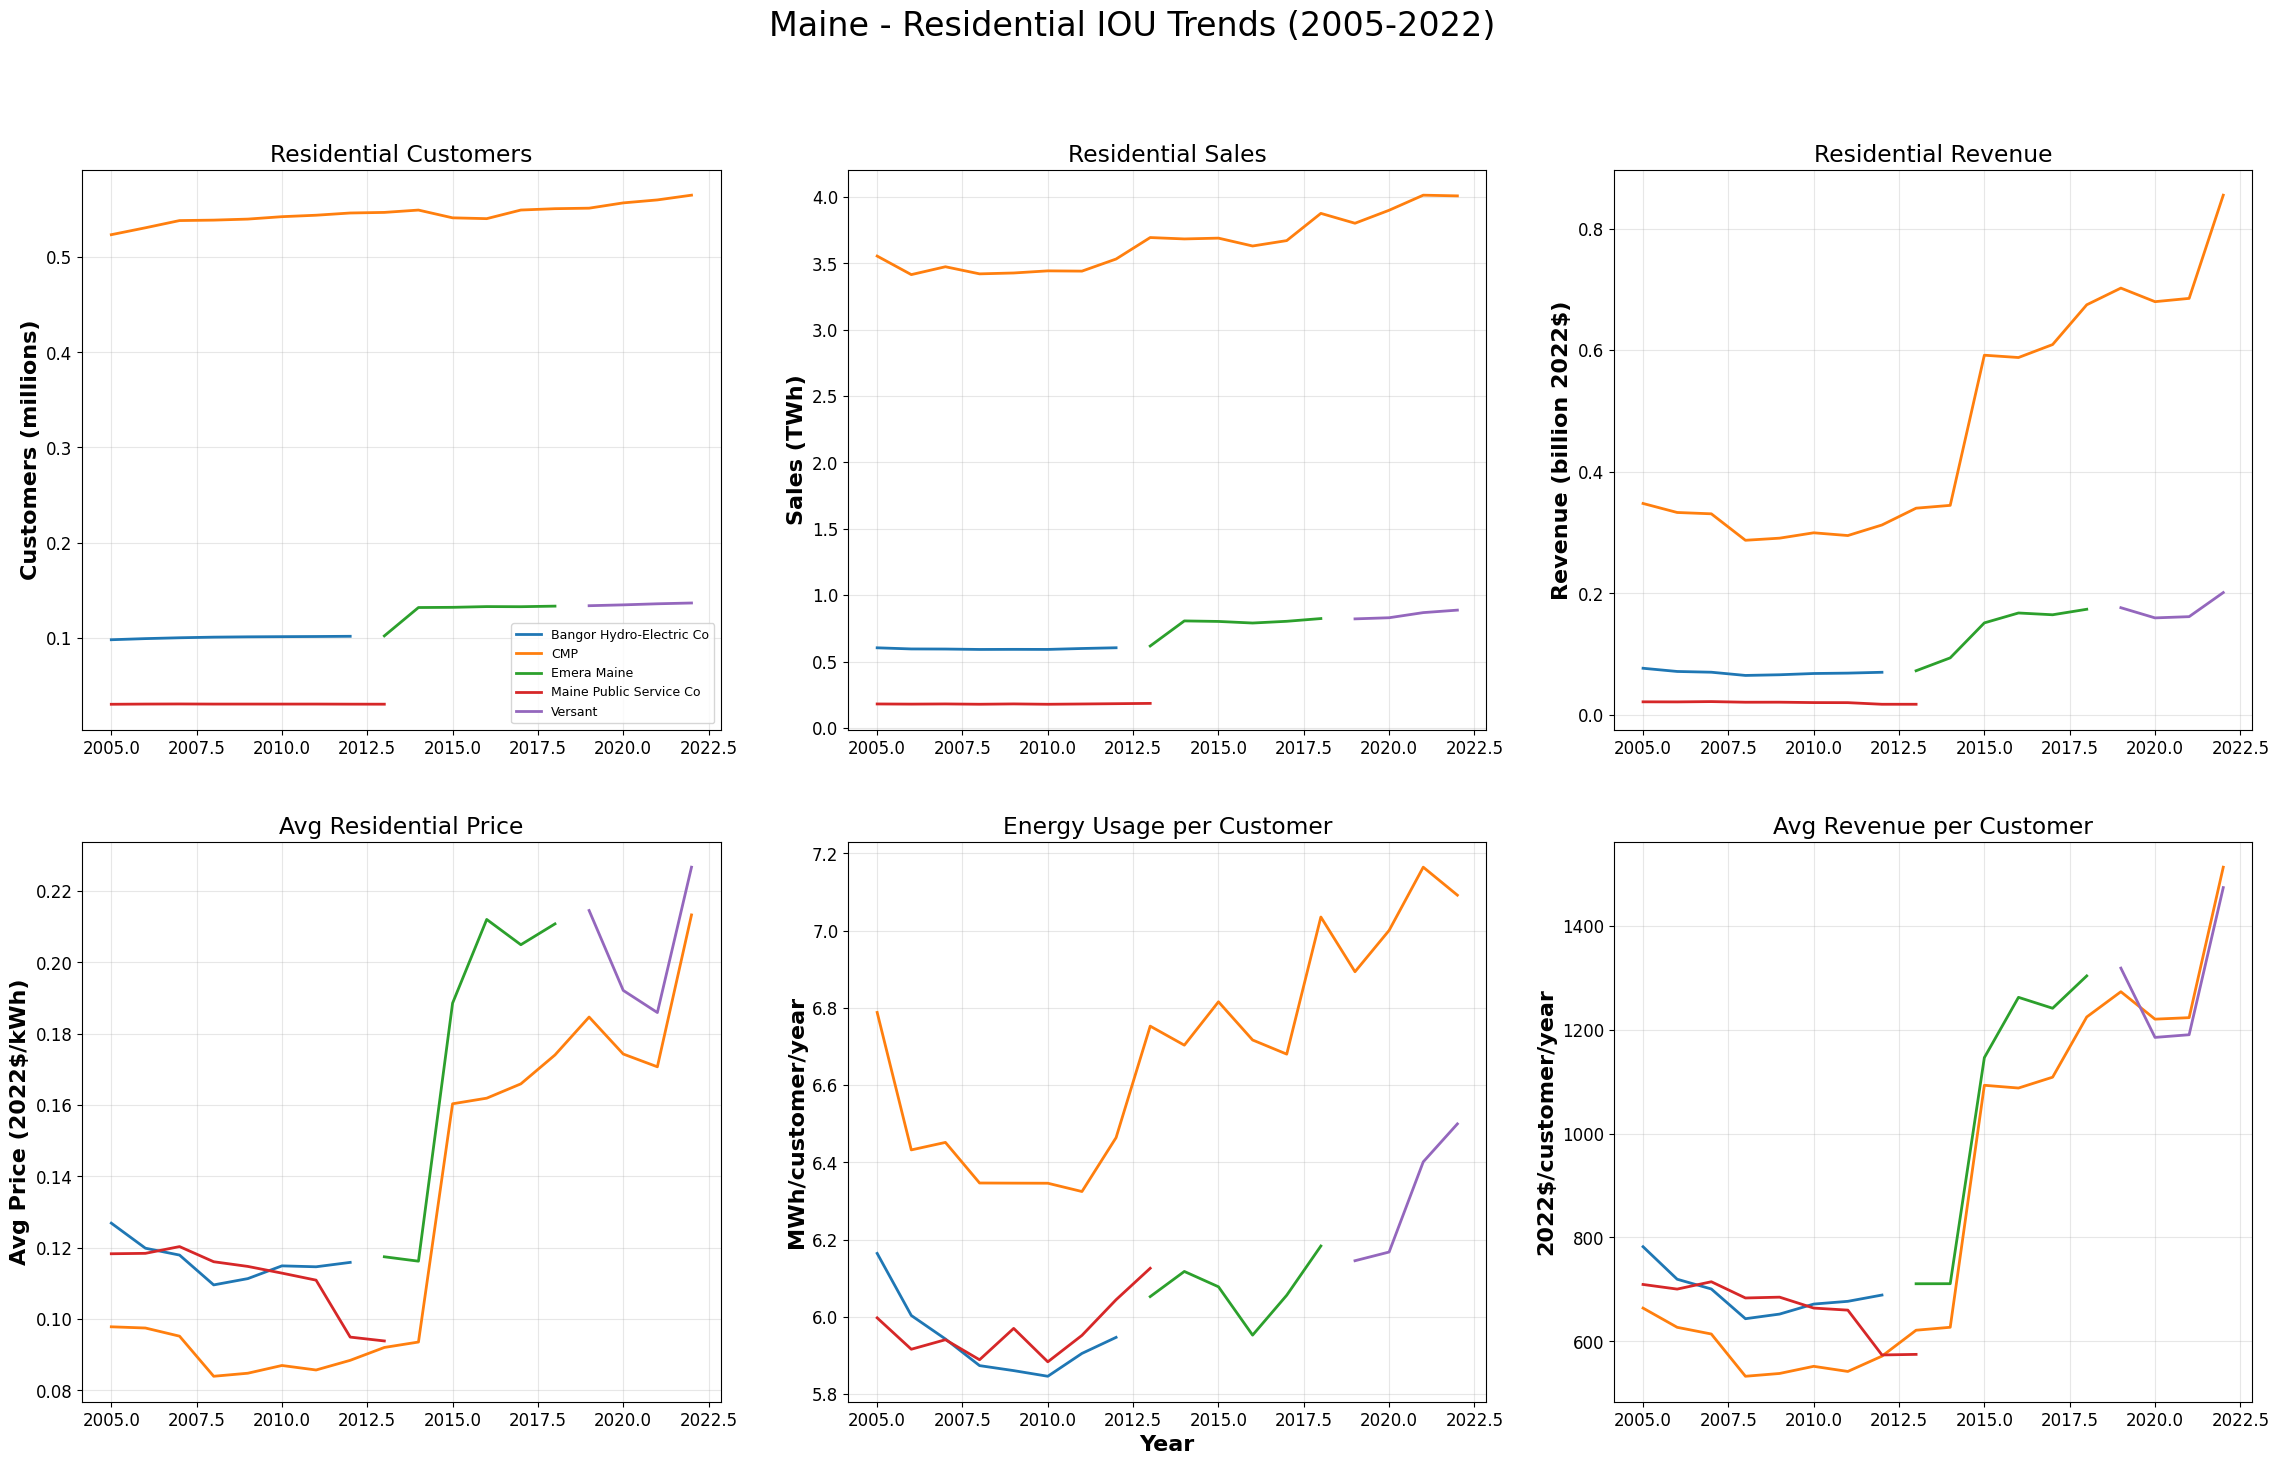

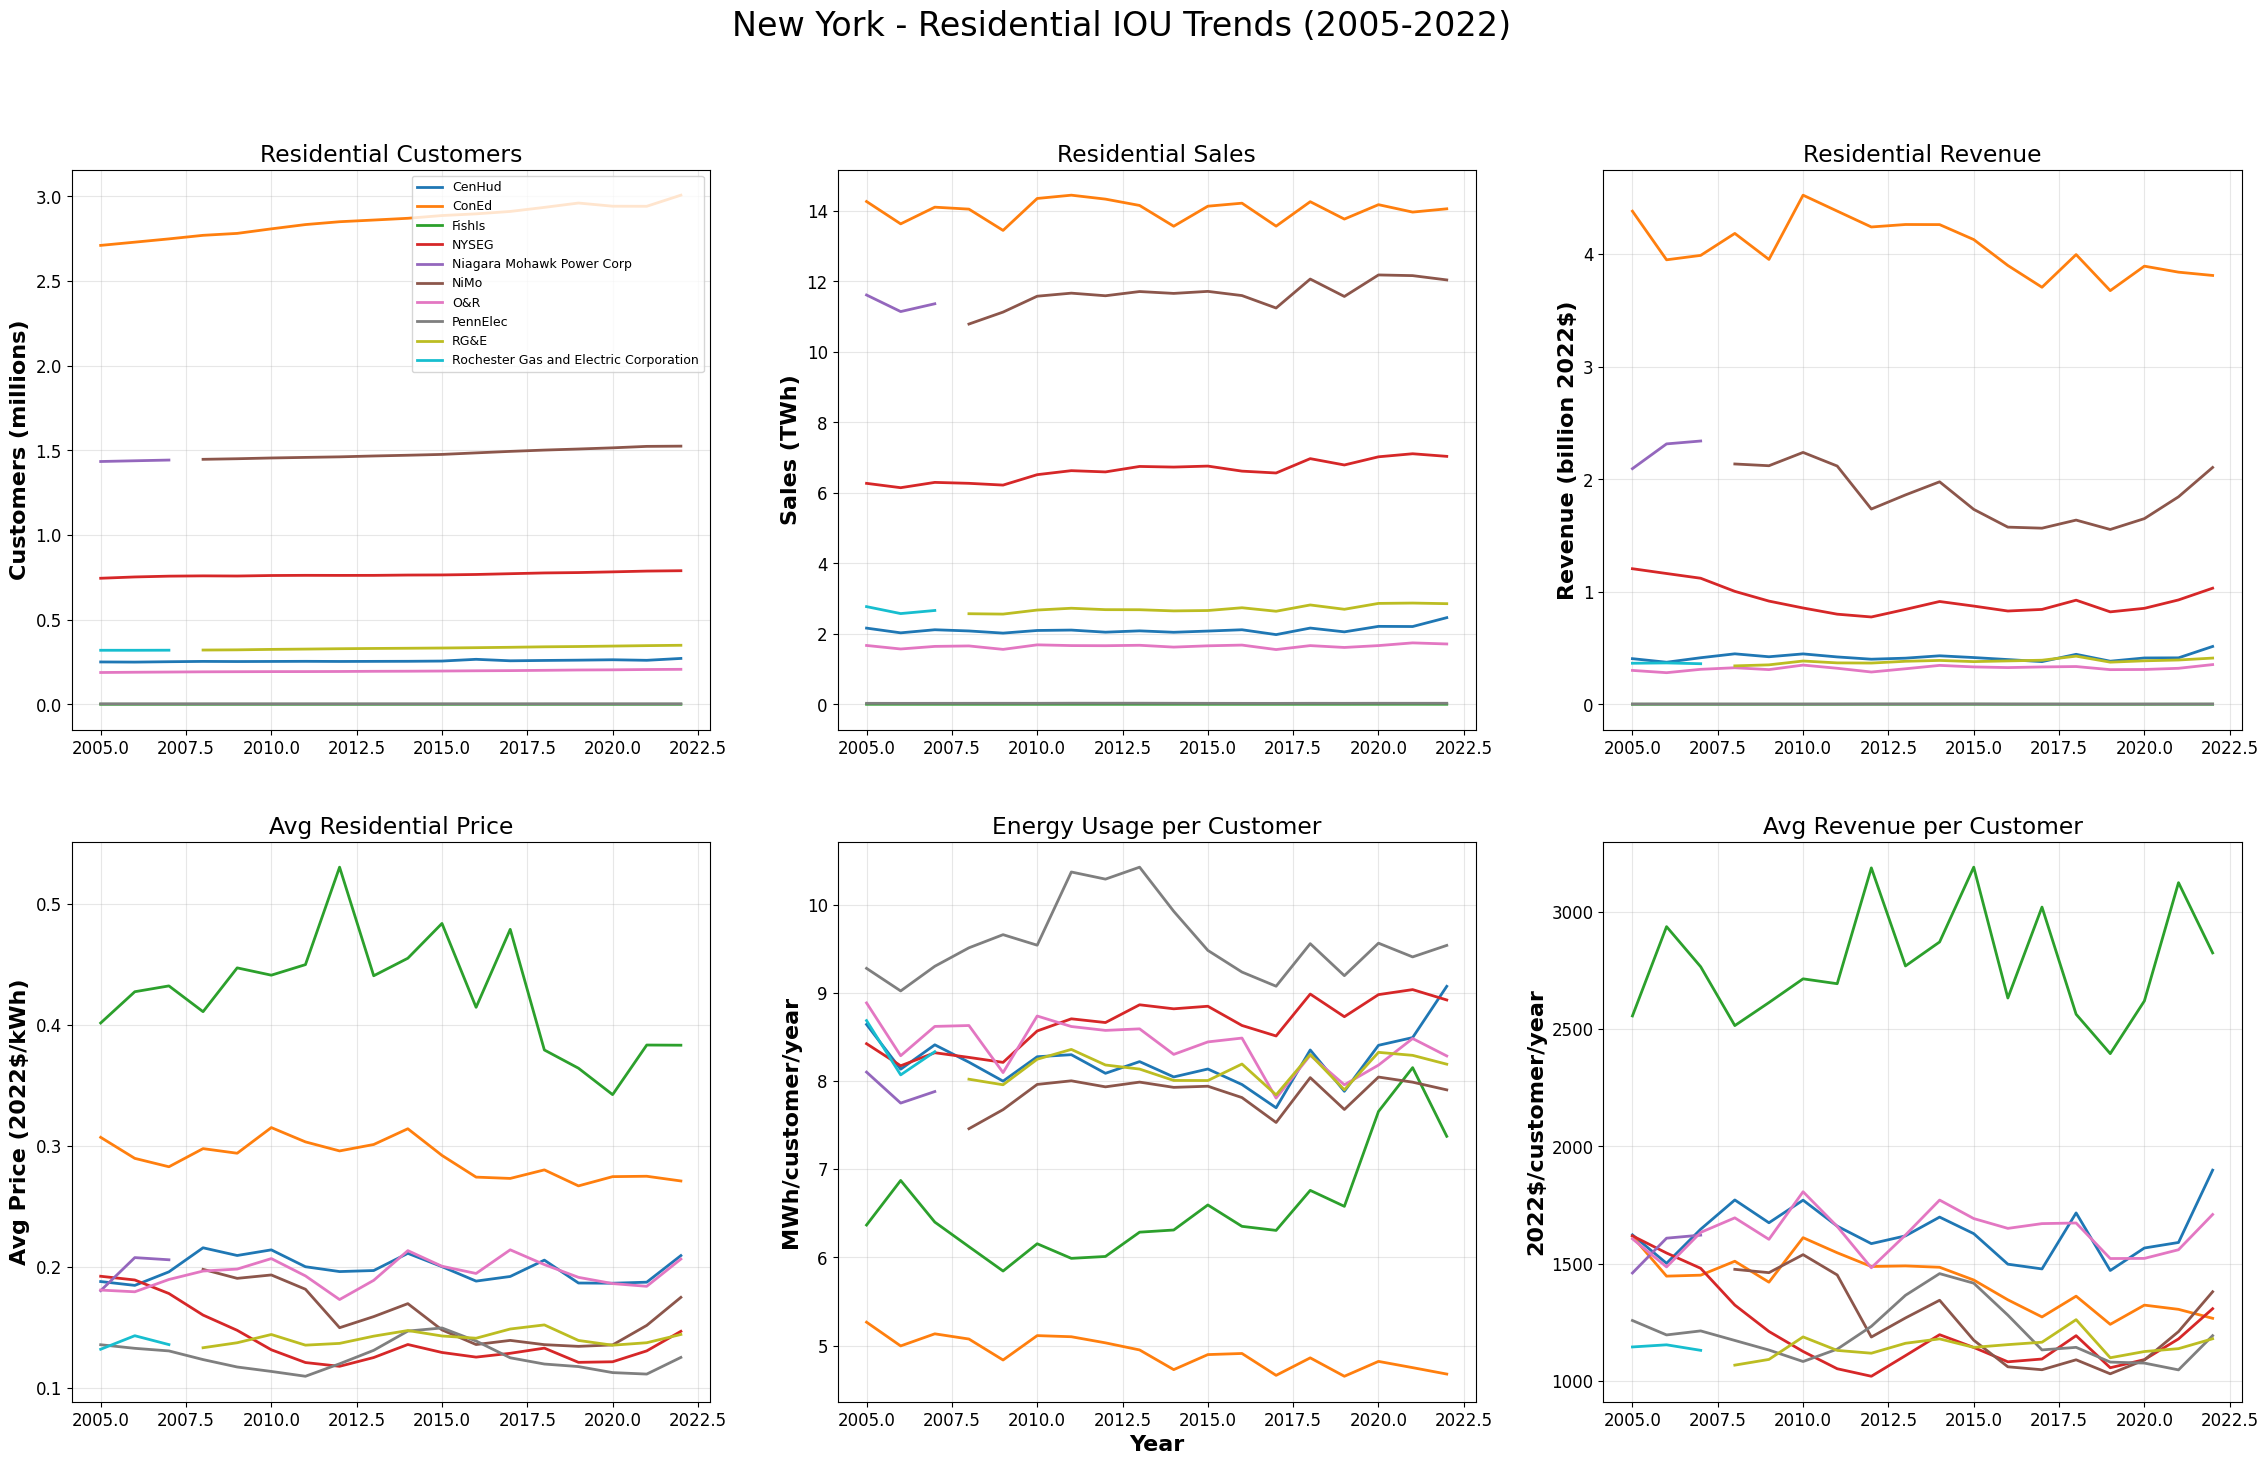

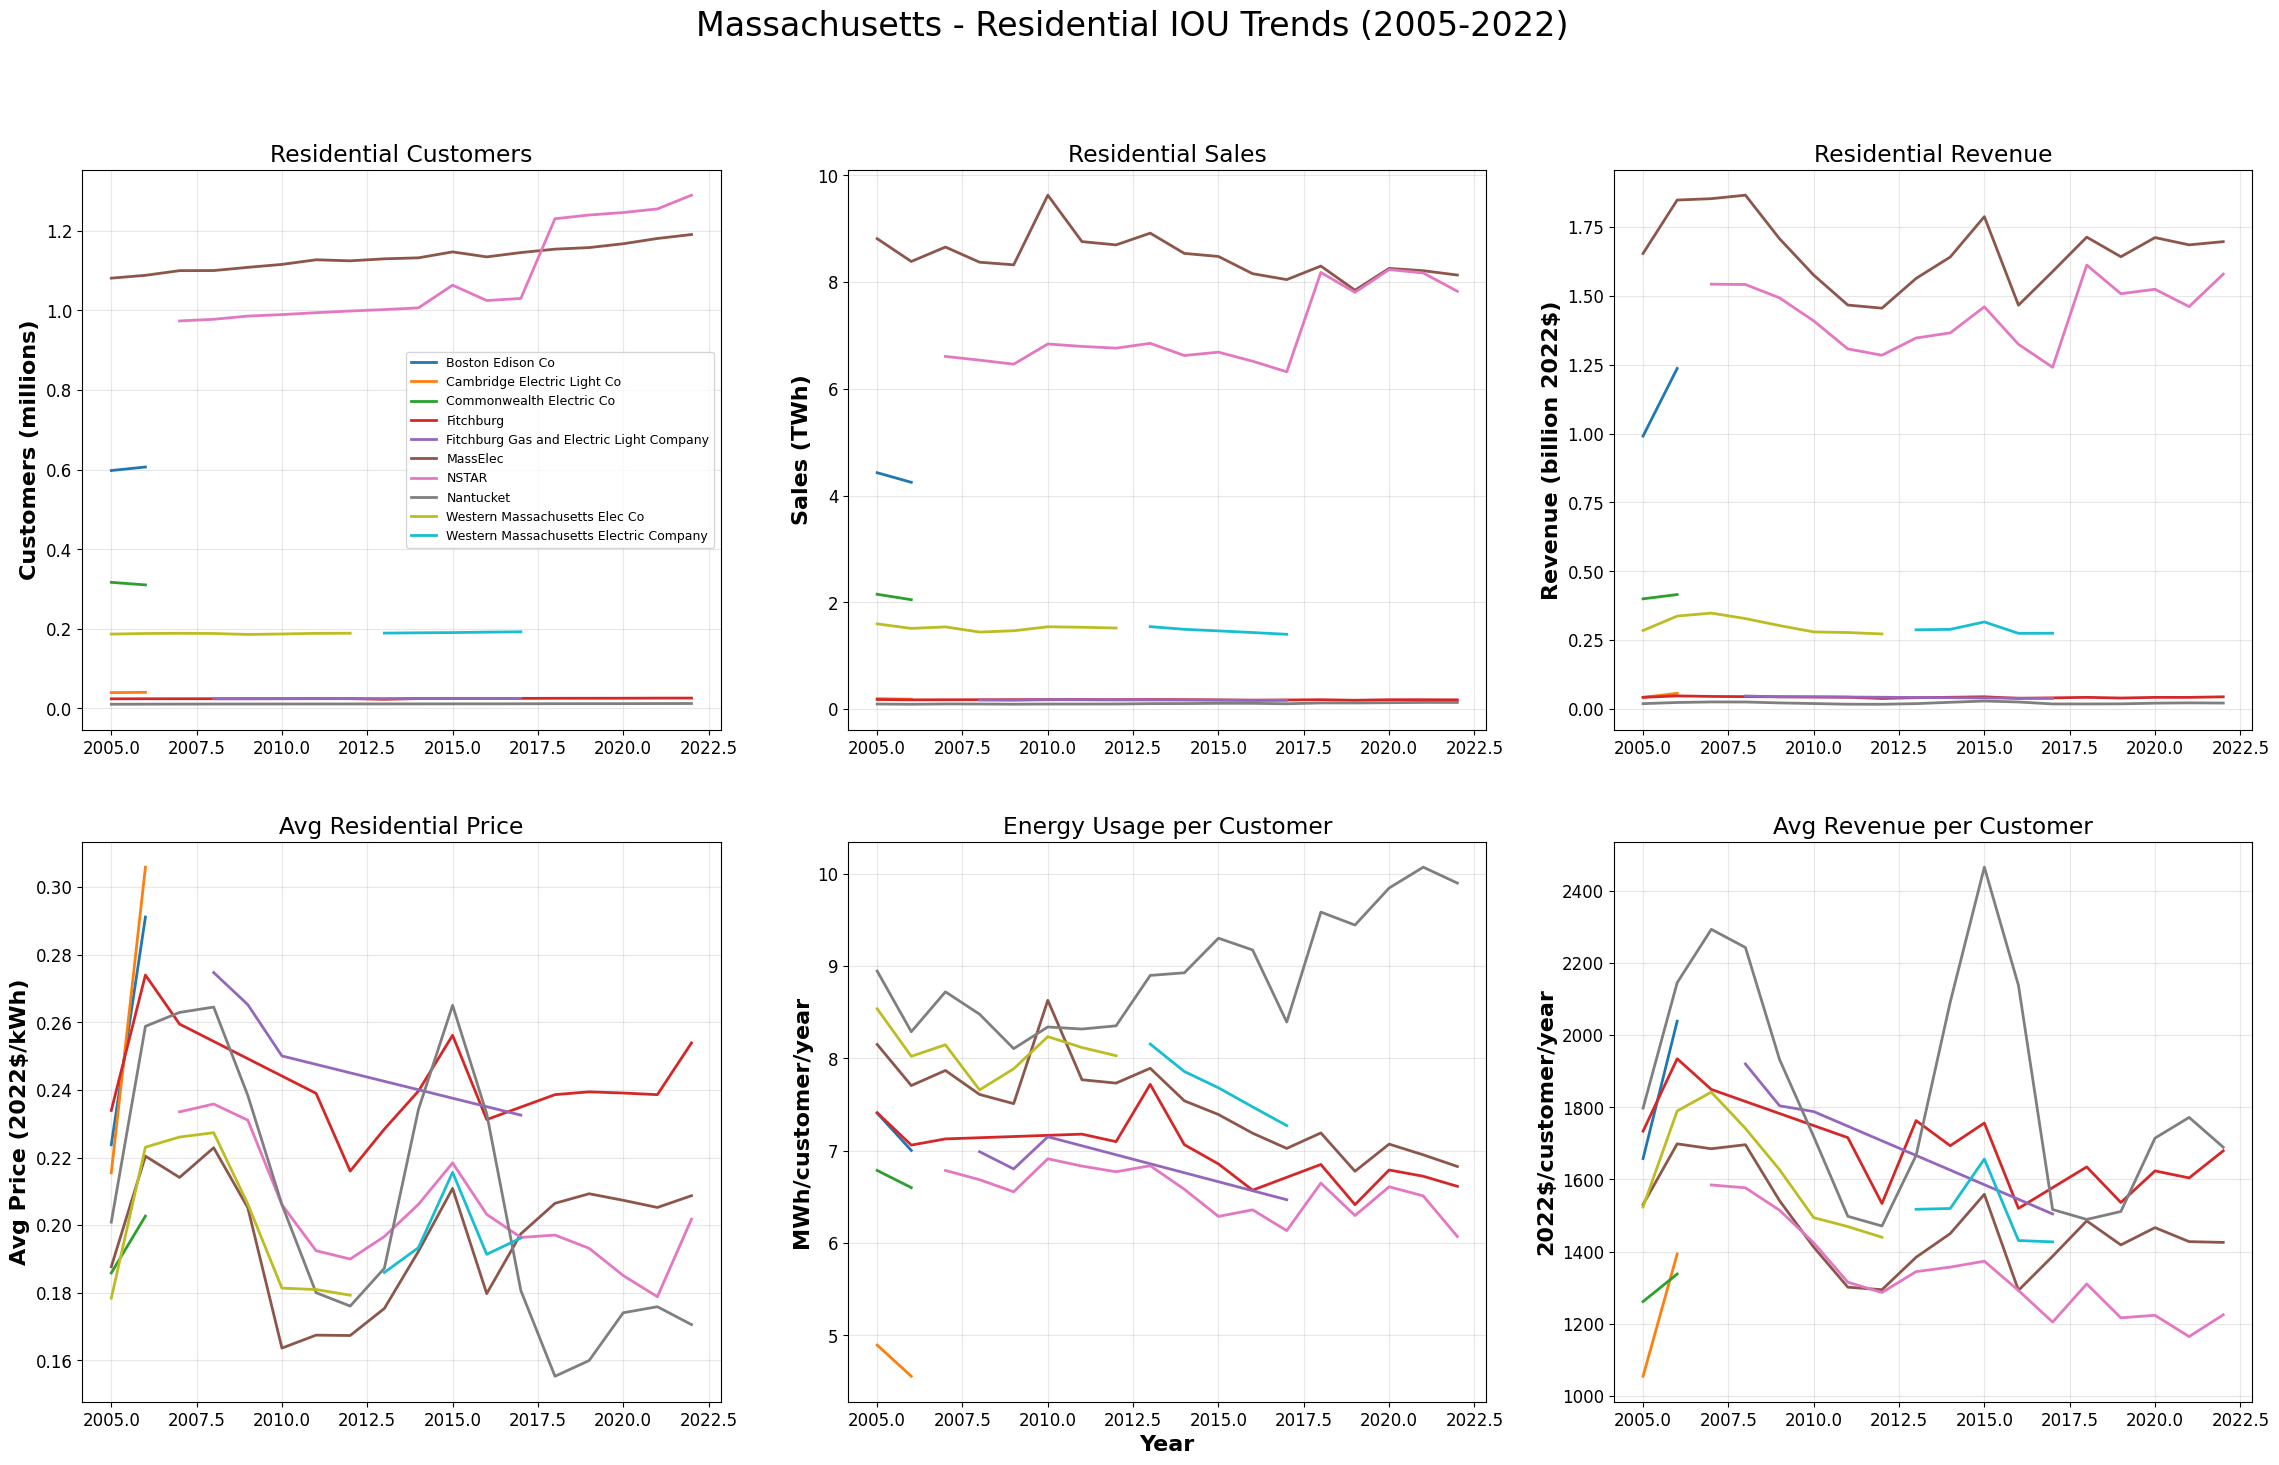

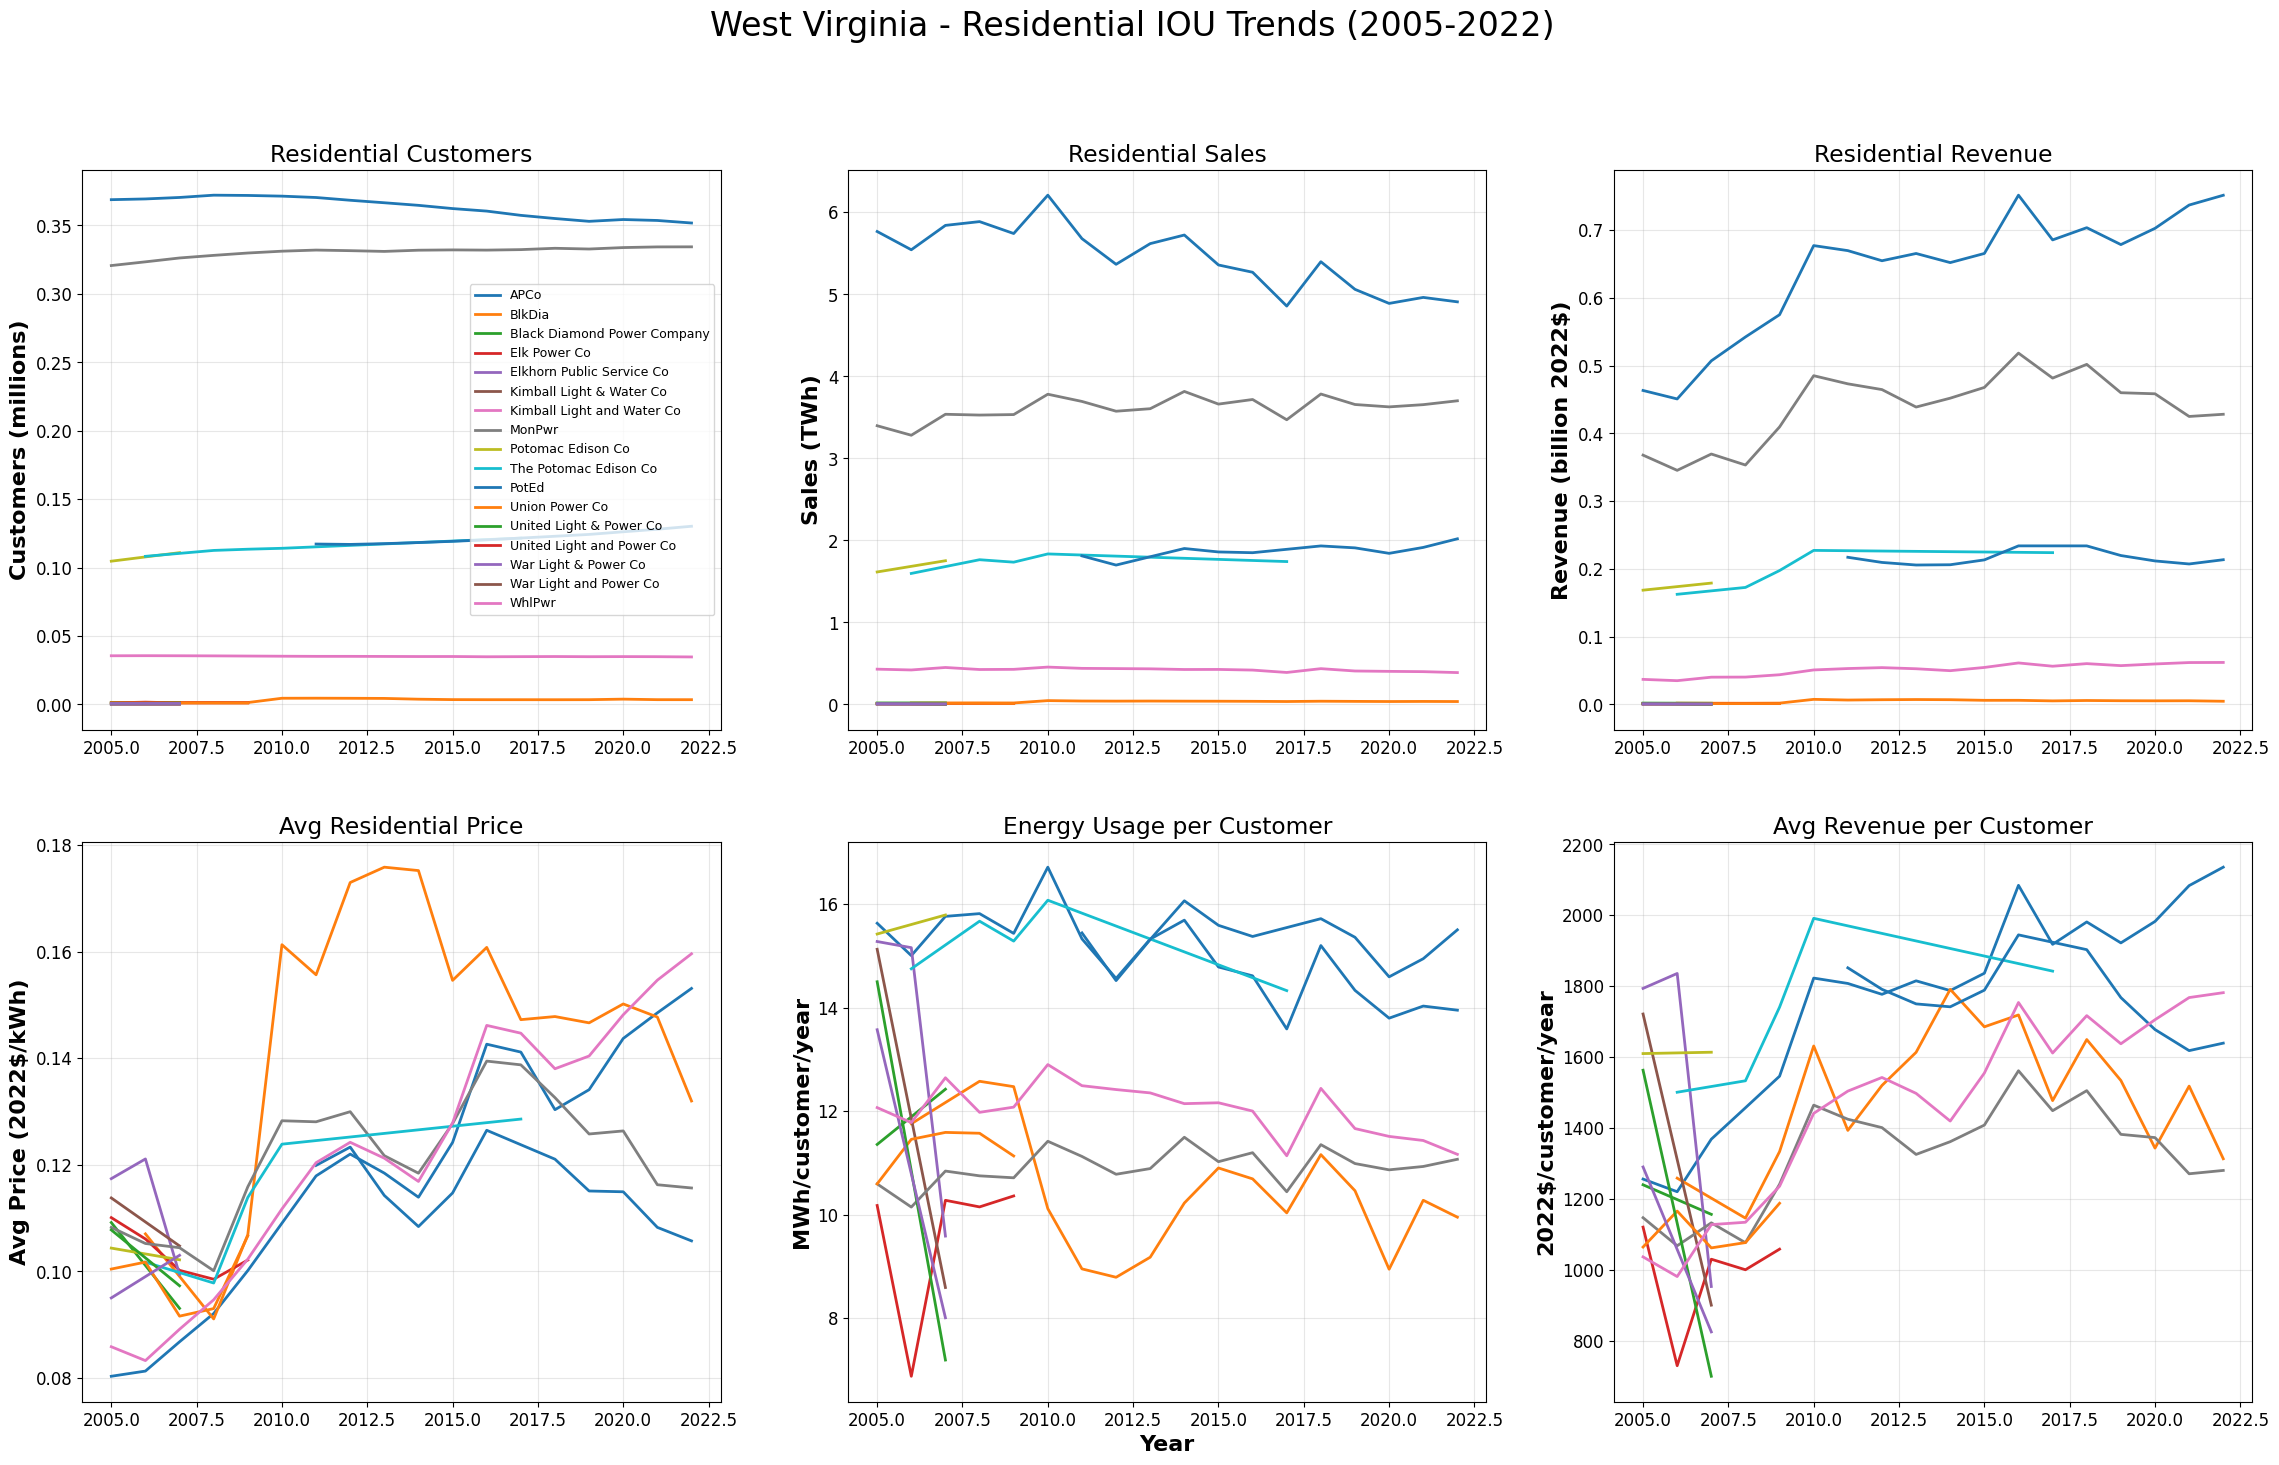

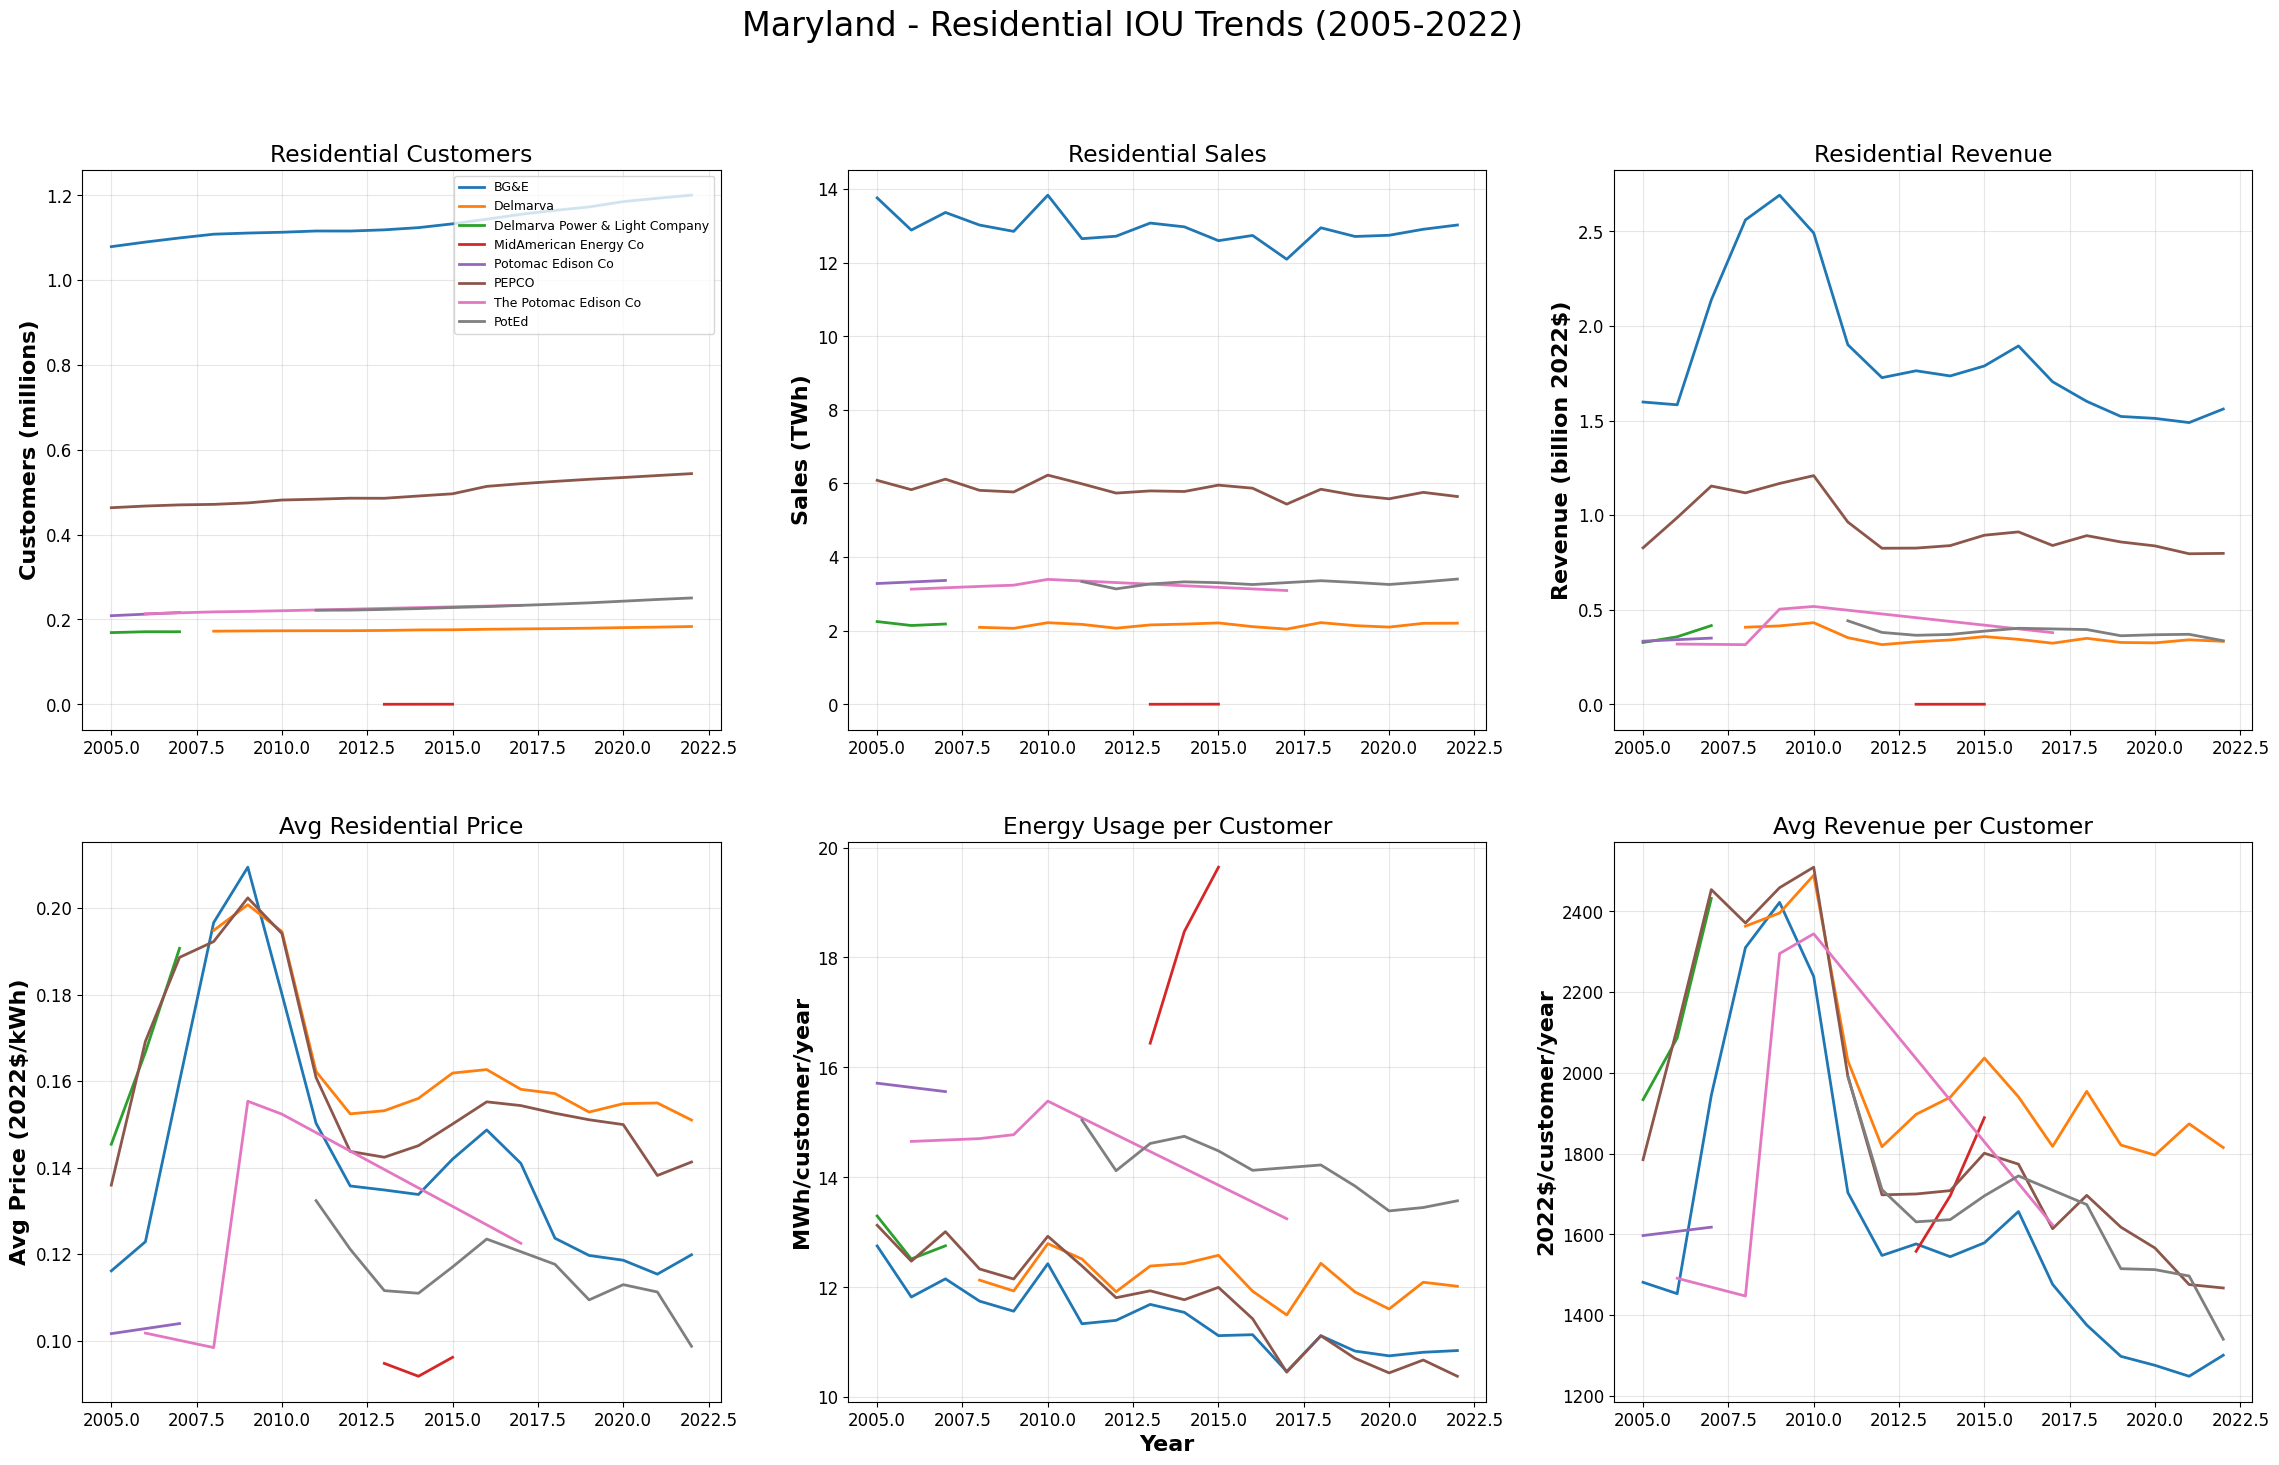

In [10]:
# Per-utility residential trends within each state
# One figure per state, 2x3 grid

for st in TARGET_STATES:
    st_data = all_eia[(all_eia['State'] == st)].copy()
    # Aggregate by utility and year (sum across service types)
    util_ts = st_data.groupby(['Utility Name', 'Year']).agg({
        'Customers_res': 'sum', 'Sales (MWh)_res': 'sum', 'Revenue (thousand$)_res': 'sum'
    }).reset_index()
    # Inflate using pre-computed multipliers
    util_ts['real_Revenue (thousand$)_res'] = util_ts.apply(
        lambda x: x['Revenue (thousand$)_res'] * cpi_multipliers[x['Year']], axis=1
    )

    utils = sorted(util_ts['Utility Name'].unique())
    # Use abbreviated names
    abbrev = {u: name_abbrev.get(u, u) for u in utils}

    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(28, 16))
    for ax in axs.flatten():
        ax.grid(visible=True, alpha=0.3)

    for util in utils:
        udata = util_ts[util_ts['Utility Name'] == util].copy()
        # Filter to rows with nonzero customers and sales to avoid division by zero
        udata = udata[(udata['Customers_res'] > 0) & (udata['Sales (MWh)_res'] > 0)]
        if len(udata) == 0:
            continue
        lbl = abbrev[util]

        axs[0, 0].plot(udata['Year'], udata['Customers_res'] / 1e6, label=lbl, linewidth=2)
        axs[0, 1].plot(udata['Year'], udata['Sales (MWh)_res'] / 1e6, label=lbl, linewidth=2)
        axs[0, 2].plot(udata['Year'], udata['real_Revenue (thousand$)_res'] / 1e6, label=lbl, linewidth=2)

        avg_price = (udata['real_Revenue (thousand$)_res'] * 1e3) / (udata['Sales (MWh)_res'] * 1e3)
        axs[1, 0].plot(udata['Year'], avg_price, label=lbl, linewidth=2)

        energy_per_cust = udata['Sales (MWh)_res'].values / udata['Customers_res'].values
        axs[1, 1].plot(udata['Year'], energy_per_cust, label=lbl, linewidth=2)

        rev_per_cust = (udata['real_Revenue (thousand$)_res'].values * 1e3) / udata['Customers_res'].values
        axs[1, 2].plot(udata['Year'], rev_per_cust, label=lbl, linewidth=2)

    axs[0, 0].set_ylabel('Customers (millions)')
    axs[0, 0].set_title('Residential Customers')
    axs[0, 1].set_ylabel('Sales (TWh)')
    axs[0, 1].set_title('Residential Sales')
    axs[0, 2].set_ylabel('Revenue (billion 2022$)')
    axs[0, 2].set_title('Residential Revenue')
    axs[1, 0].set_ylabel('Avg Price (2022$/kWh)')
    axs[1, 0].set_title('Avg Residential Price')
    axs[1, 1].set_ylabel('MWh/customer/year')
    axs[1, 1].set_title('Energy Usage per Customer')
    axs[1, 2].set_ylabel('2022$/customer/year')
    axs[1, 2].set_title('Avg Revenue per Customer')

    axs[0, 0].legend(loc='best', fontsize=9)

    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel('Year')
    plt.suptitle(f'{STATE_NAMES[st]} - Residential IOU Trends (2005-2022)', fontsize=24, y=0.98)

    fig.savefig(f'HighCostStates_Outputs/Fig2b_{st}_PerUtility_Residential.png', dpi=300, bbox_inches='tight')
    plt.show()

# FERC Form 1 Data - T&D Expenses
Transmission & Distribution related expenses for IOUs in target states

In [11]:
# Load FERC data
ferc = pd.read_csv('FERC1_datafiles/dispositions_and_opex_and_transmission_and_sales_and_rev_and_tdplant.csv')

# Load EIA-FERC mapping
eia_ferc = pd.read_csv('FERC1_datafiles/eia ferc fuzzy matched manually corrected.csv').dropna(subset='eia')
eia_codes = pd.read_csv('FERC1_datafiles/utilities_entity_eia.csv')
ferc_codes = pd.read_csv('FERC1_datafiles/utilities_ferc1.csv')

merged_eia_codes = pd.merge(eia_ferc, eia_codes, left_on='eia', right_on='utility_name_eia', how='left')
merged_ferc_codes = pd.merge(merged_eia_codes, ferc_codes, left_on='ferc', right_on='utility_name_ferc1', how='right')[
    ['utility_id_eia', 'utility_id_ferc1', 'utility_name_ferc1', 'utility_name_eia']
]

# Get state information
states = pd.read_csv('FERC1_datafiles/utilities_eia860.csv', usecols=[0, 2, 5])
states['year_dt'] = pd.to_datetime(states['report_date']).dt.year

# Filter to target states
state_utils = states[states['state'].isin(TARGET_STATES)][['utility_id_eia', 'state']].drop_duplicates()

# Merge to get FERC IDs for utilities in target states
ferc_target = pd.merge(state_utils, merged_ferc_codes, on='utility_id_eia', how='inner').dropna().drop_duplicates()

print(f'FERC utilities in target states: {len(ferc_target)}')
for _, row in ferc_target.iterrows():
    print(f"  {row['state']}: {row['utility_name_ferc1'][:50]} (FERC ID: {row['utility_id_ferc1']})")

FERC utilities in target states: 31
  MD: Baltimore Gas and Electric Company (FERC ID: 248)
  MA: Boston Edison Company (FERC ID: 3)
  MA: Cambridge Electric Light Company (FERC ID: 4)
  MA: CANAL ELECTRIC COMPANY (FERC ID: 5)
  ME: Central Maine Power Company (FERC ID: 212)
  MA: Commonwealth Electric Company (FERC ID: 11)
  MA: Eastern Edison Company (FERC ID: 13)
  ME: Maine Electric Power Company, Inc. (FERC ID: 213)
  ME: Maine Public Service Company (FERC ID: 302)
  ME: Maine Yankee Atomic Power Company (FERC ID: 350)
  MA: entergy mississippi, llc (FERC ID: 382)
  MA: Montaup Electric Company (FERC ID: 29)
  NY: Moreau Manufacturing (FERC ID: 55)
  MA: Nantucket Electric Company (FERC ID: 426)
  MA: New England Power Company (FERC ID: 274)
  NY: New York State Electric & Gas Corporation (FERC ID: 215)
  NY: Niagara Mohawk Power Corporation (FERC ID: 275)
  NY: PSEG Power New York Inc. (FERC ID: 87)
  NY: Pike County Light and Power Company (FERC ID: 429)
  WV: Wheeling Power Com

In [12]:
# Merge FERC data with state/utility info
ferc_data = pd.merge(
    ferc_target,
    ferc,
    on='utility_id_ferc1',
    how='inner'
)

# Check columns after merge (utility_name_ferc1 may have suffixes from both sides)
ferc1_name_col = [c for c in ferc_data.columns if c.startswith('utility_name_ferc1')][0]
if ferc1_name_col != 'utility_name_ferc1':
    ferc_data = ferc_data.rename(columns={ferc1_name_col: 'utility_name_ferc1'})

print(f'Merged FERC data: {len(ferc_data)} rows')

# Key T&D expense columns
td_cols = [
    'distribution_maintenance_expense_electric',
    'distribution_operation_expenses_electric',
    'transmission_maintenance_expense_electric',
    'transmission_operation_expense',
    'additions_transmission_plant',
    'additions_distribution_plant'
]

# Filter to available columns
available_td_cols = [c for c in td_cols if c in ferc_data.columns]
print(f'Available T&D columns: {available_td_cols}')

# Group by utility and year (sum in case of duplicate rows)
ferc_grouped = ferc_data.groupby(['state', 'utility_name_ferc1', 'report_year'])[available_td_cols].sum().reset_index()

# Inflate to 2022$ using pre-computed multipliers for speed
ferc_cpi_mult = {}
for yr in ferc_grouped['report_year'].unique():
    ferc_cpi_mult[int(yr)] = cpi.inflate(1.0, int(yr), to=2022)

ferc_grouped['cpi_mult'] = ferc_grouped['report_year'].map(ferc_cpi_mult)
for col in available_td_cols:
    ferc_grouped[f'real_{col}'] = ferc_grouped[col] * ferc_grouped['cpi_mult']
ferc_grouped.drop(columns='cpi_mult', inplace=True)

print(f'\nFERC data rows: {len(ferc_grouped)}')
print(f'Year range: {ferc_grouped["report_year"].min()}-{ferc_grouped["report_year"].max()}')

Merged FERC data: 489 rows
Available T&D columns: ['distribution_maintenance_expense_electric', 'distribution_operation_expenses_electric', 'transmission_maintenance_expense_electric', 'transmission_operation_expense', 'additions_transmission_plant', 'additions_distribution_plant']



FERC data rows: 489
Year range: 1994-2022


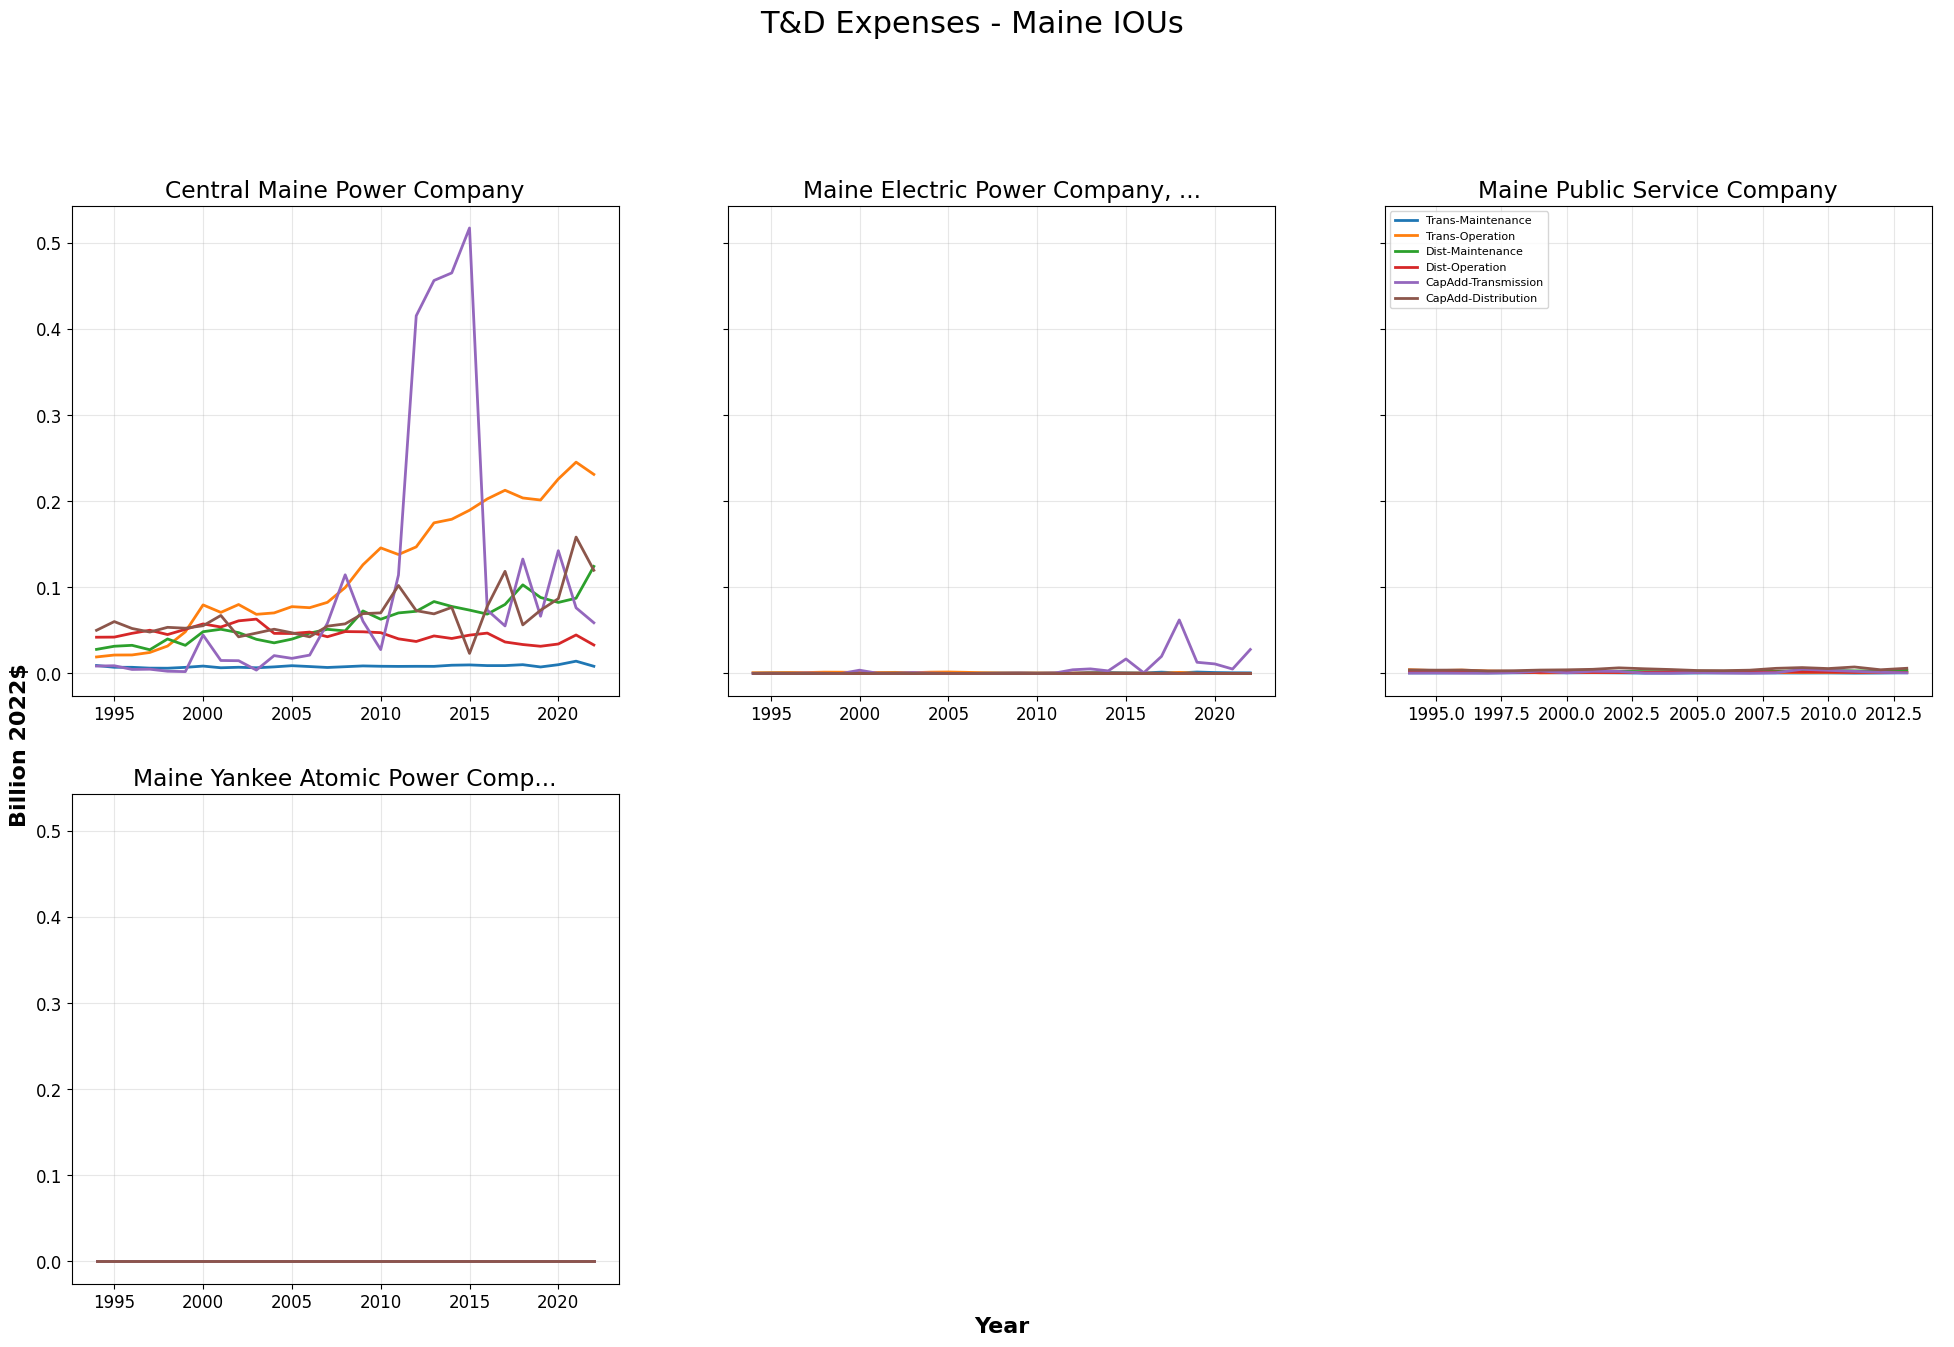

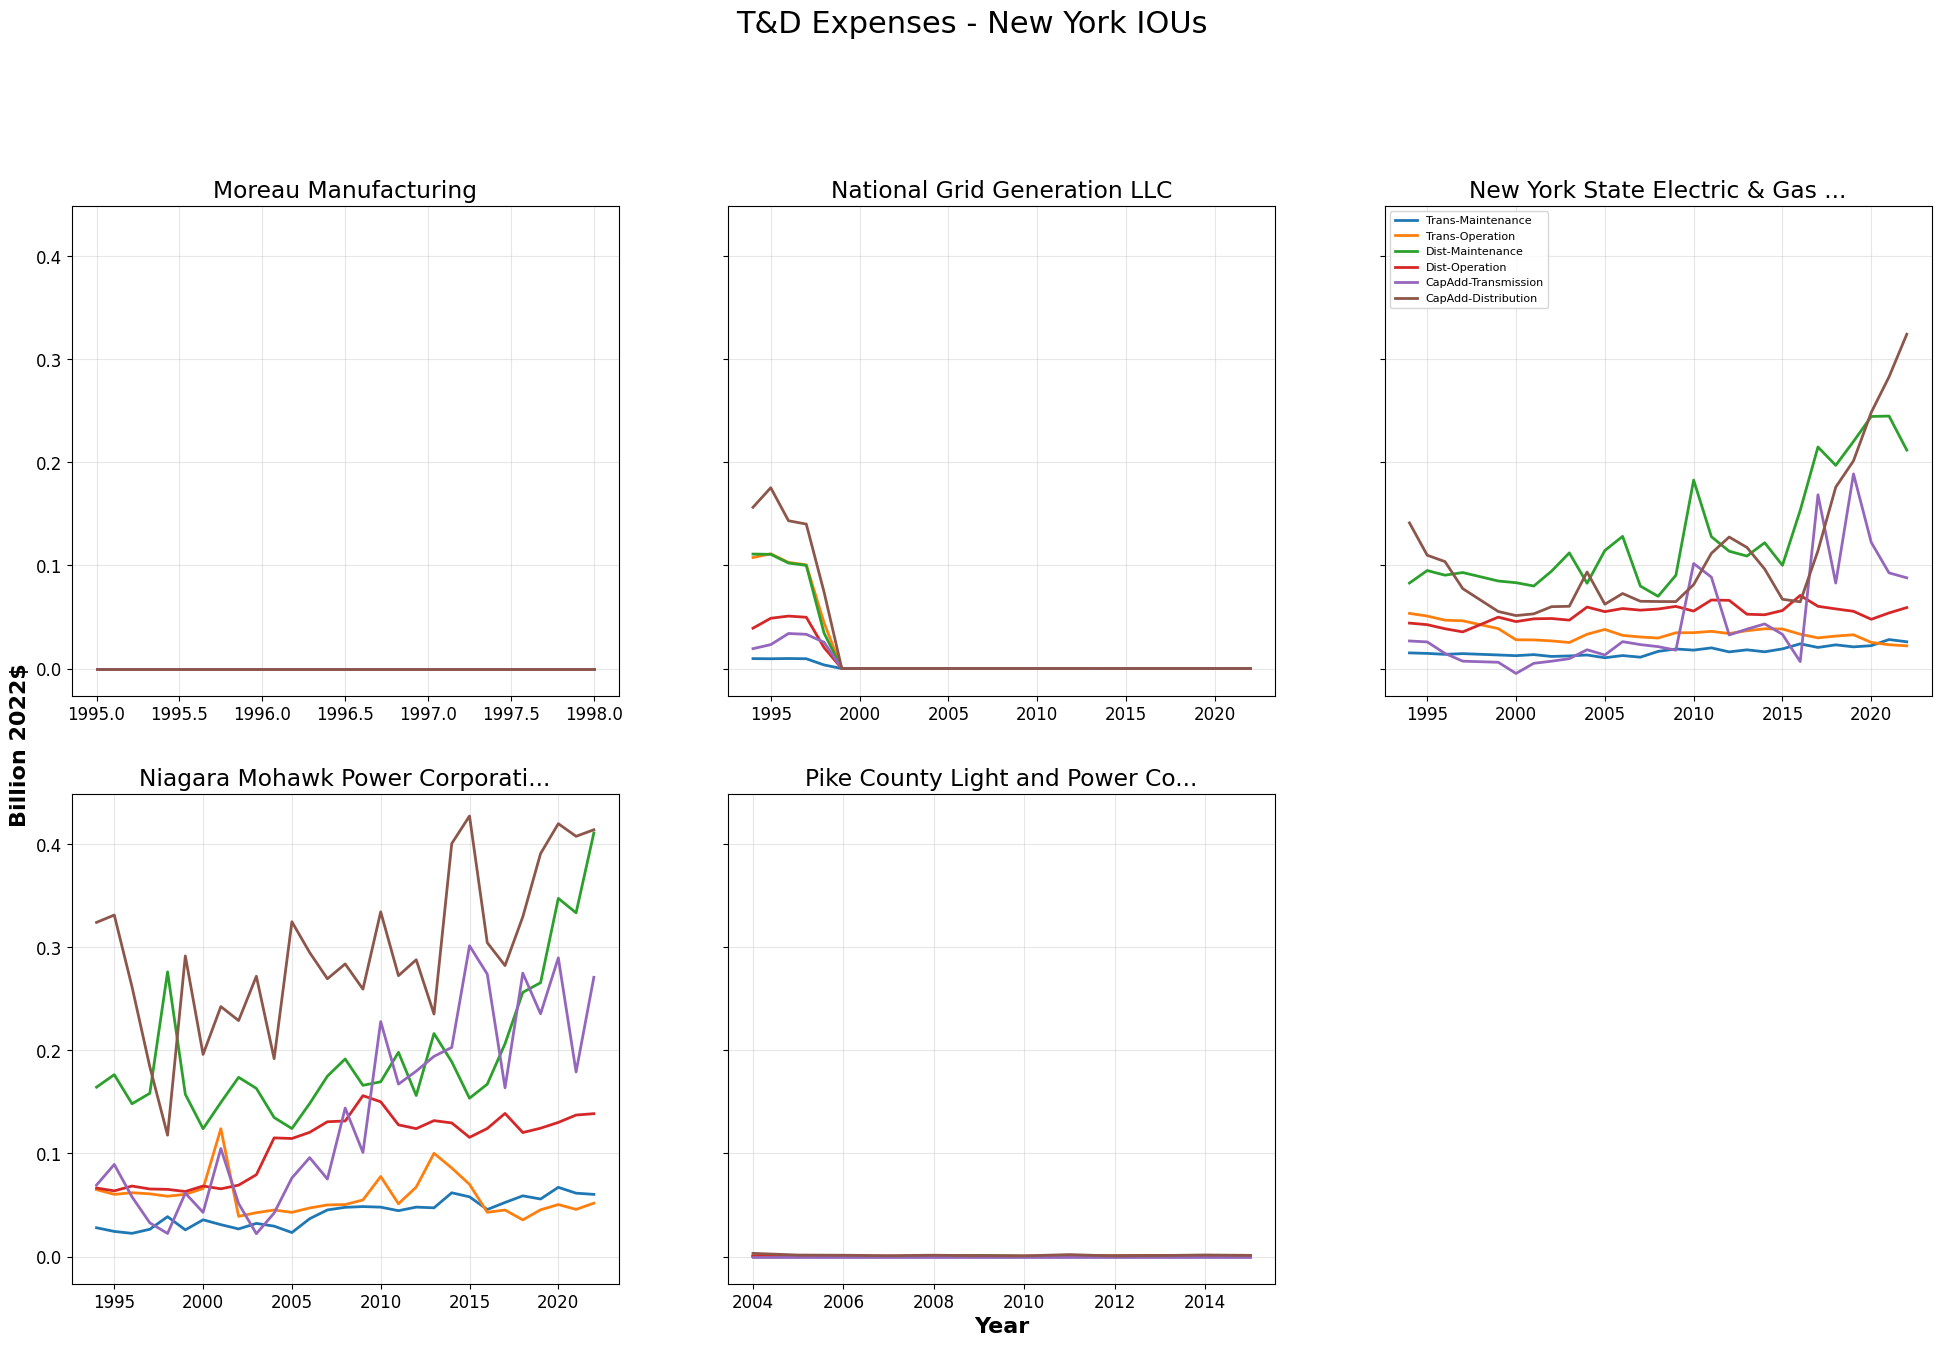

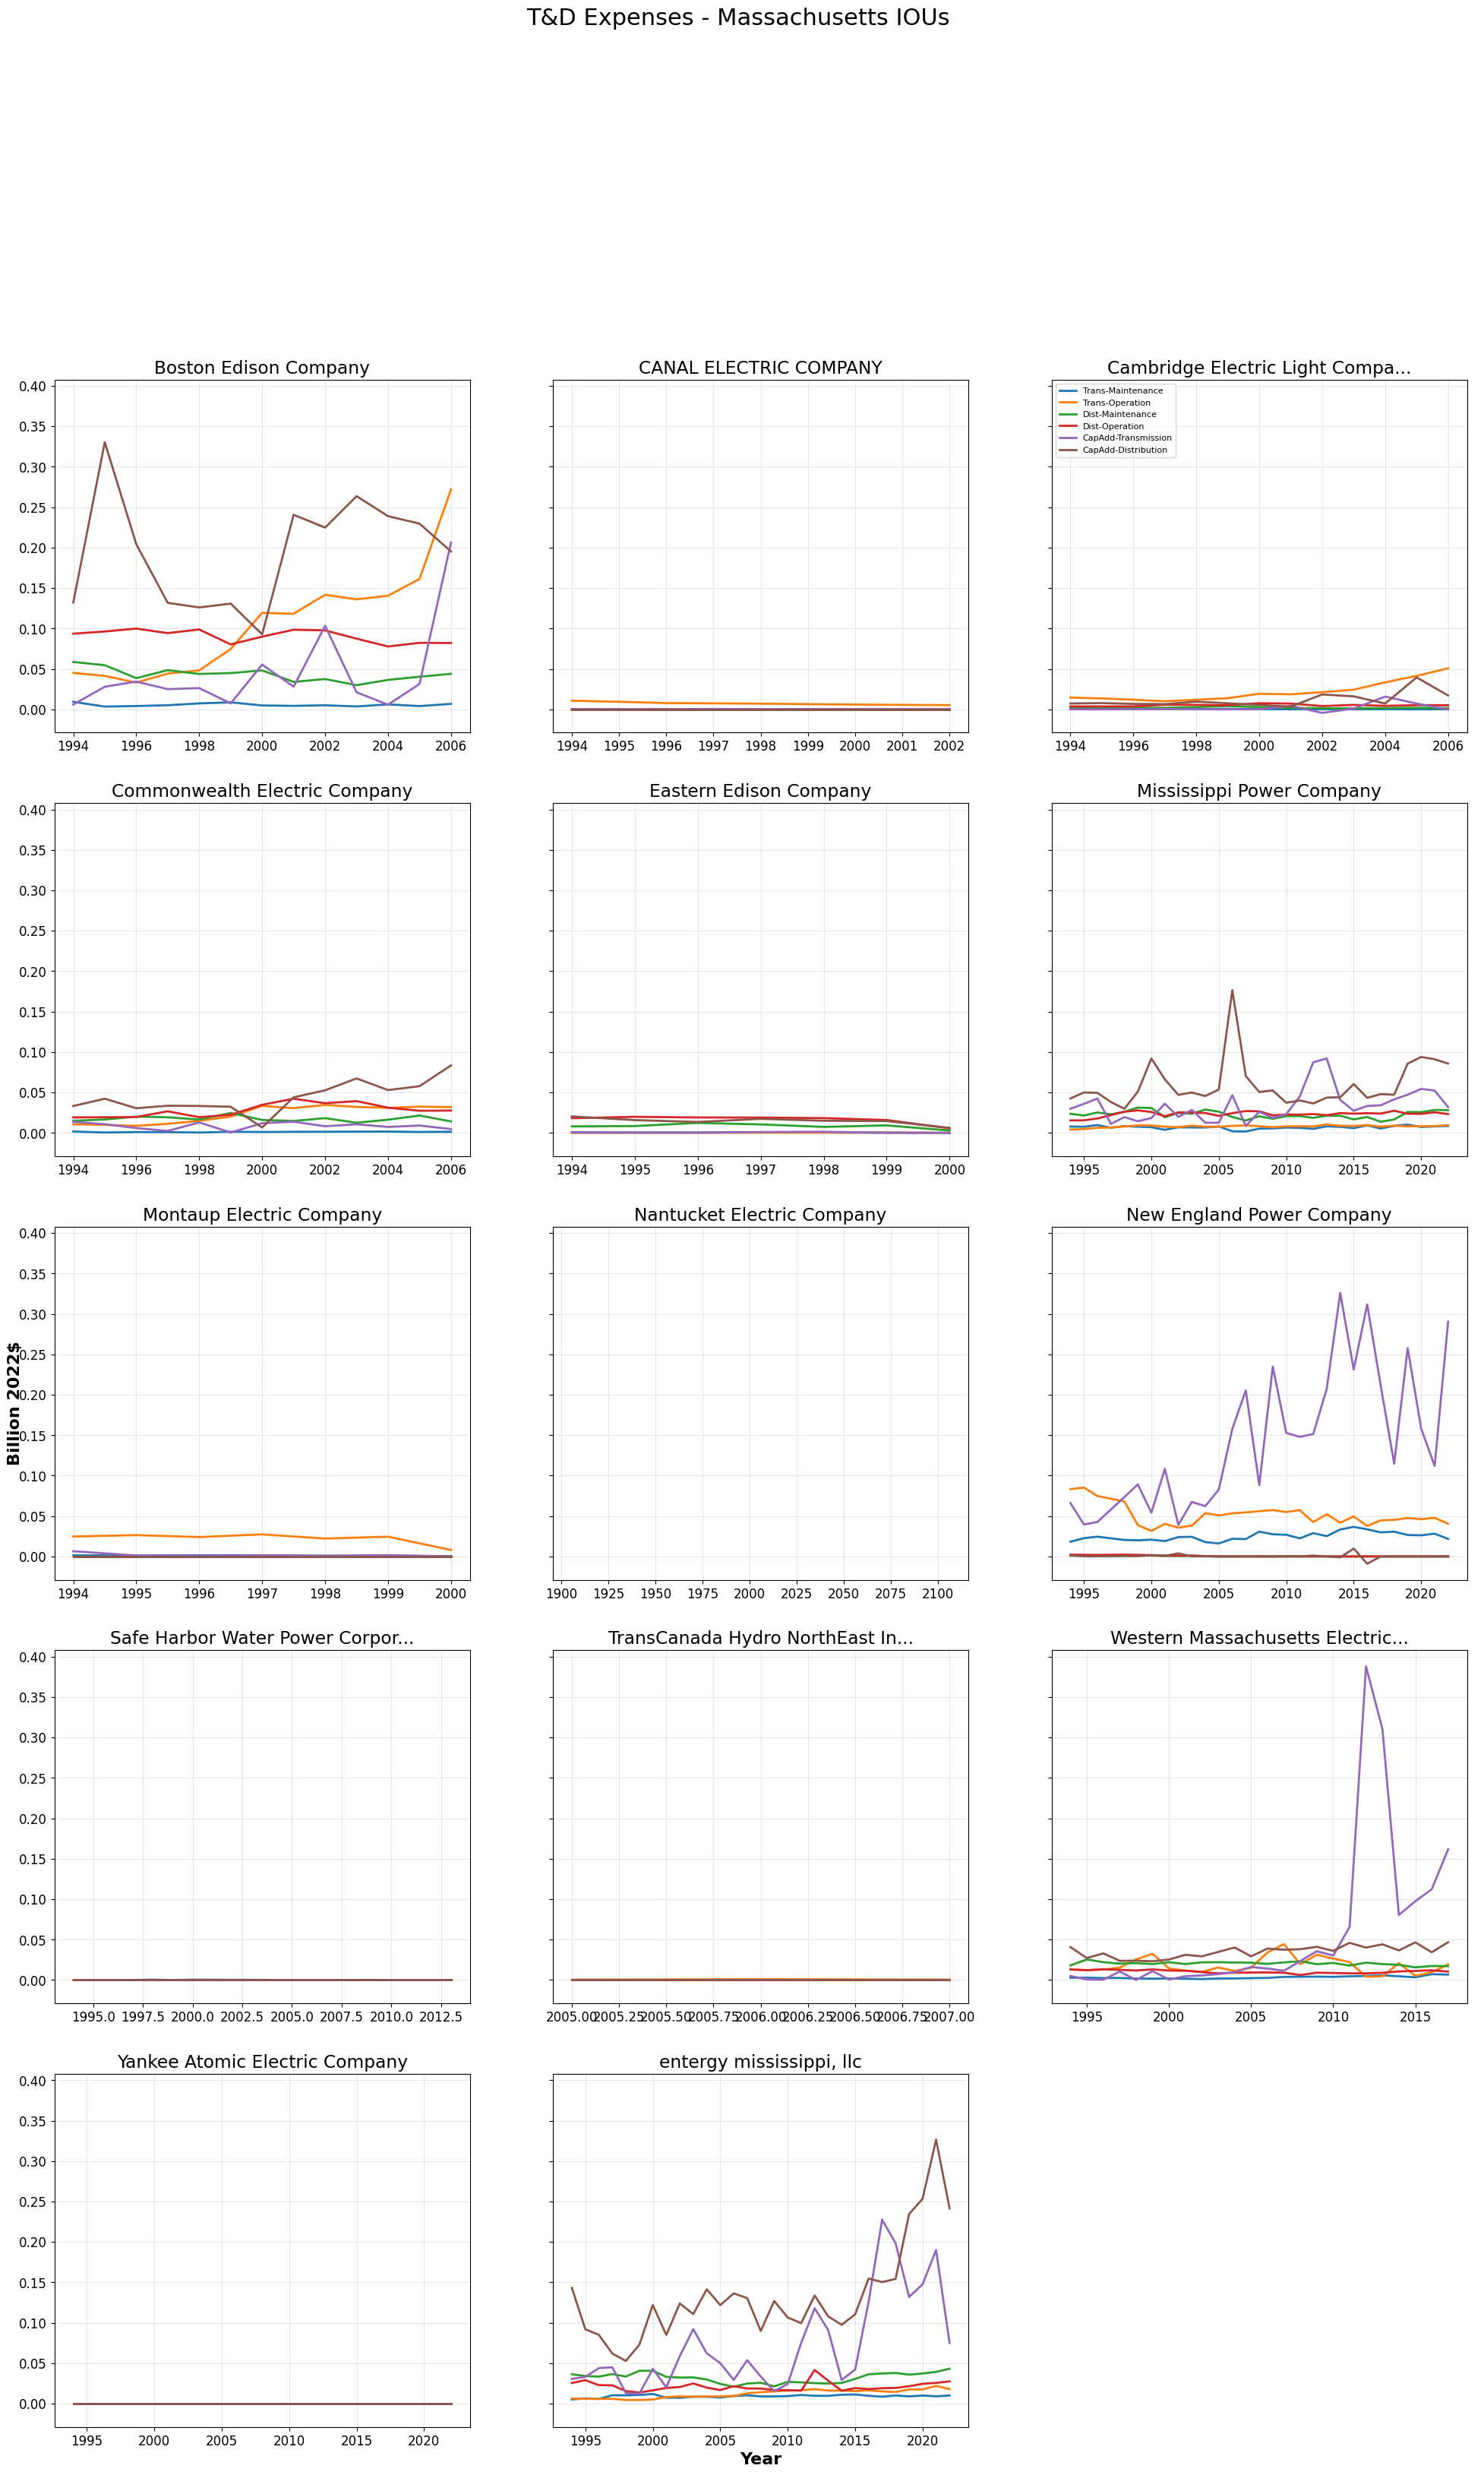

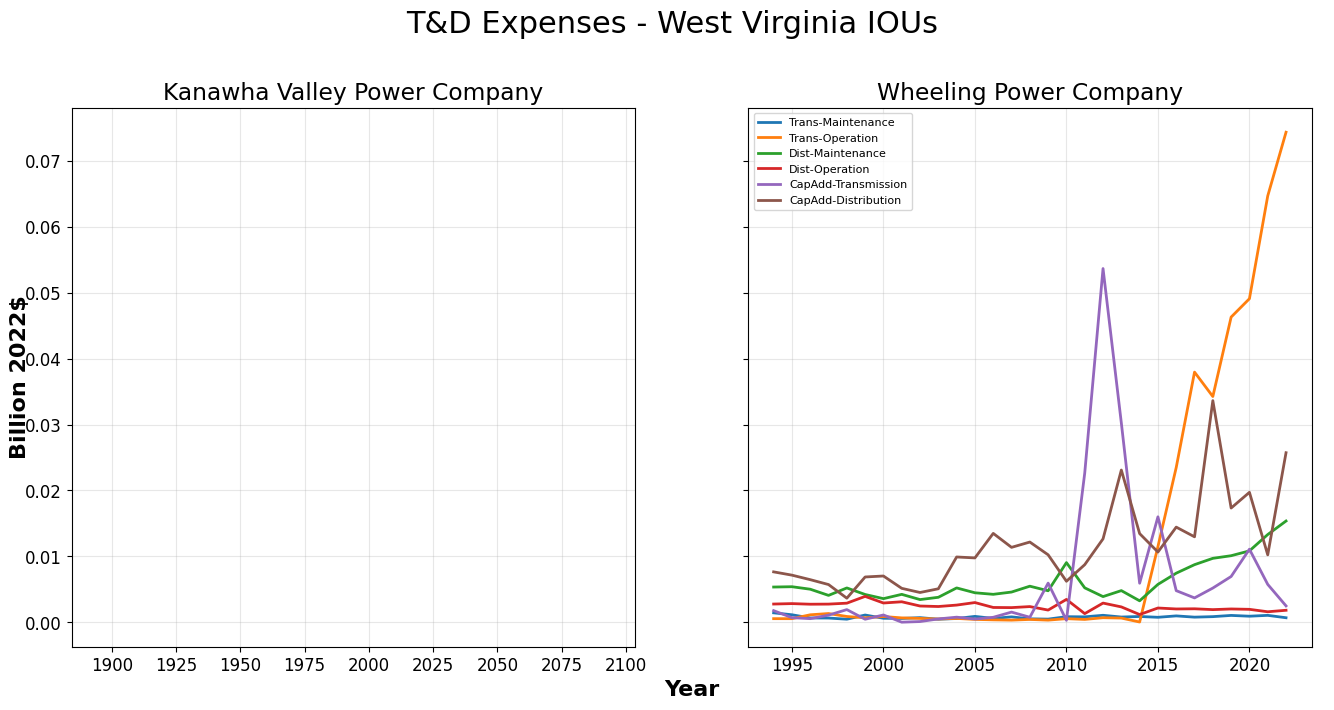

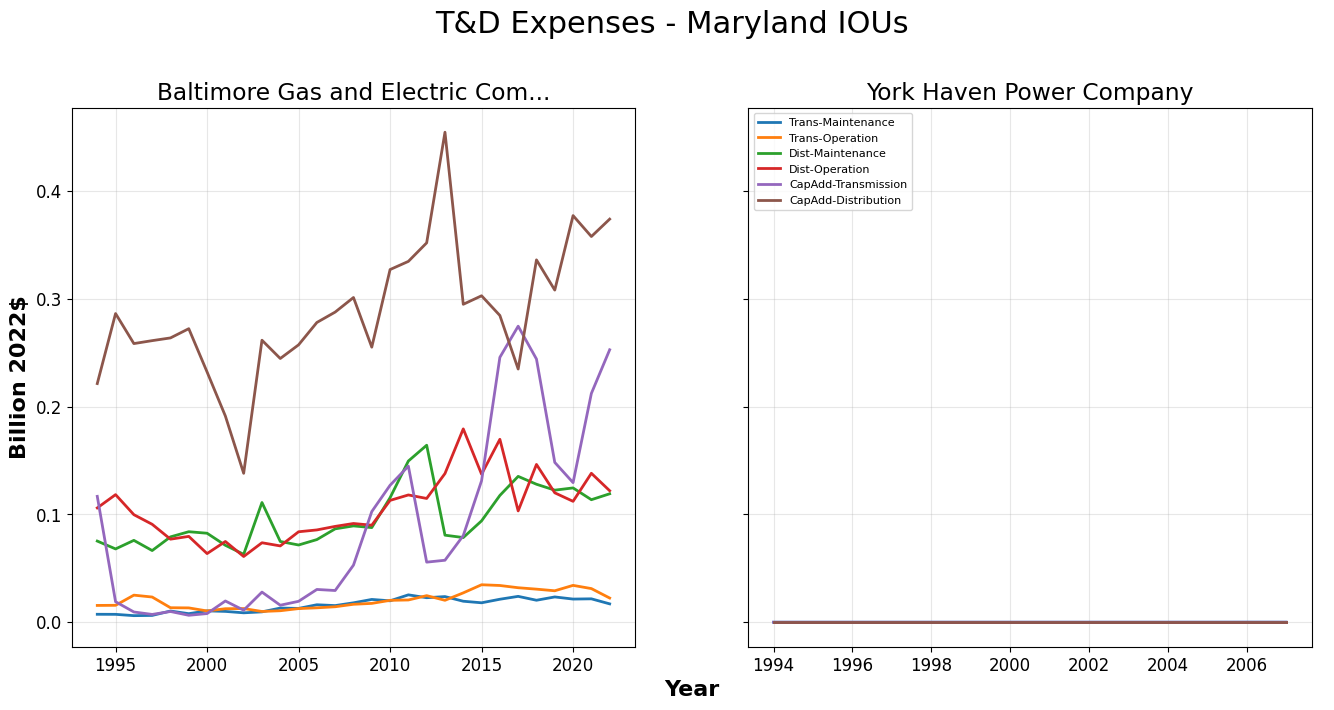

In [13]:
# T&D Expenses per utility - one subplot per utility, grouped by state
# Similar to the CA analysis: show transmission vs distribution O&M and capital additions

for st in TARGET_STATES:
    st_ferc = ferc_grouped[ferc_grouped['state'] == st]
    utils = sorted(st_ferc['utility_name_ferc1'].unique())

    if len(utils) == 0:
        print(f'No FERC data for {STATE_NAMES[st]}')
        continue

    ncols = min(len(utils), 3)
    nrows = (len(utils) + ncols - 1) // ncols
    fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8 * ncols, 7 * nrows), sharey=True, squeeze=False)

    for idx, util in enumerate(utils):
        ax = axs[idx // ncols, idx % ncols]
        udata = st_ferc[st_ferc['utility_name_ferc1'] == util].sort_values('report_year')

        # Short name for title
        short = util[:30] + '...' if len(util) > 30 else util

        for col_name, label in [
            ('real_transmission_maintenance_expense_electric', 'Trans-Maintenance'),
            ('real_transmission_operation_expense', 'Trans-Operation'),
            ('real_distribution_maintenance_expense_electric', 'Dist-Maintenance'),
            ('real_distribution_operation_expenses_electric', 'Dist-Operation'),
            ('real_additions_transmission_plant', 'CapAdd-Transmission'),
            ('real_additions_distribution_plant', 'CapAdd-Distribution'),
        ]:
            if col_name in udata.columns:
                ax.plot(udata['report_year'], udata[col_name] / 1e9, label=label, linewidth=2)

        ax.grid(visible=True, alpha=0.3)
        ax.set_title(short)

    # Remove unused axes
    for idx in range(len(utils), nrows * ncols):
        axs[idx // ncols, idx % ncols].set_visible(False)

    axs[0, -1].legend(loc='upper left', fontsize=8)

    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    plt.xlabel('Year')
    plt.ylabel('Billion 2022$')
    plt.suptitle(f'T&D Expenses - {STATE_NAMES[st]} IOUs', fontsize=22, y=1.02)

    fig.savefig(f'HighCostStates_Outputs/Fig5_{st}_TD_Expenses.png', dpi=300, bbox_inches='tight')
    plt.show()

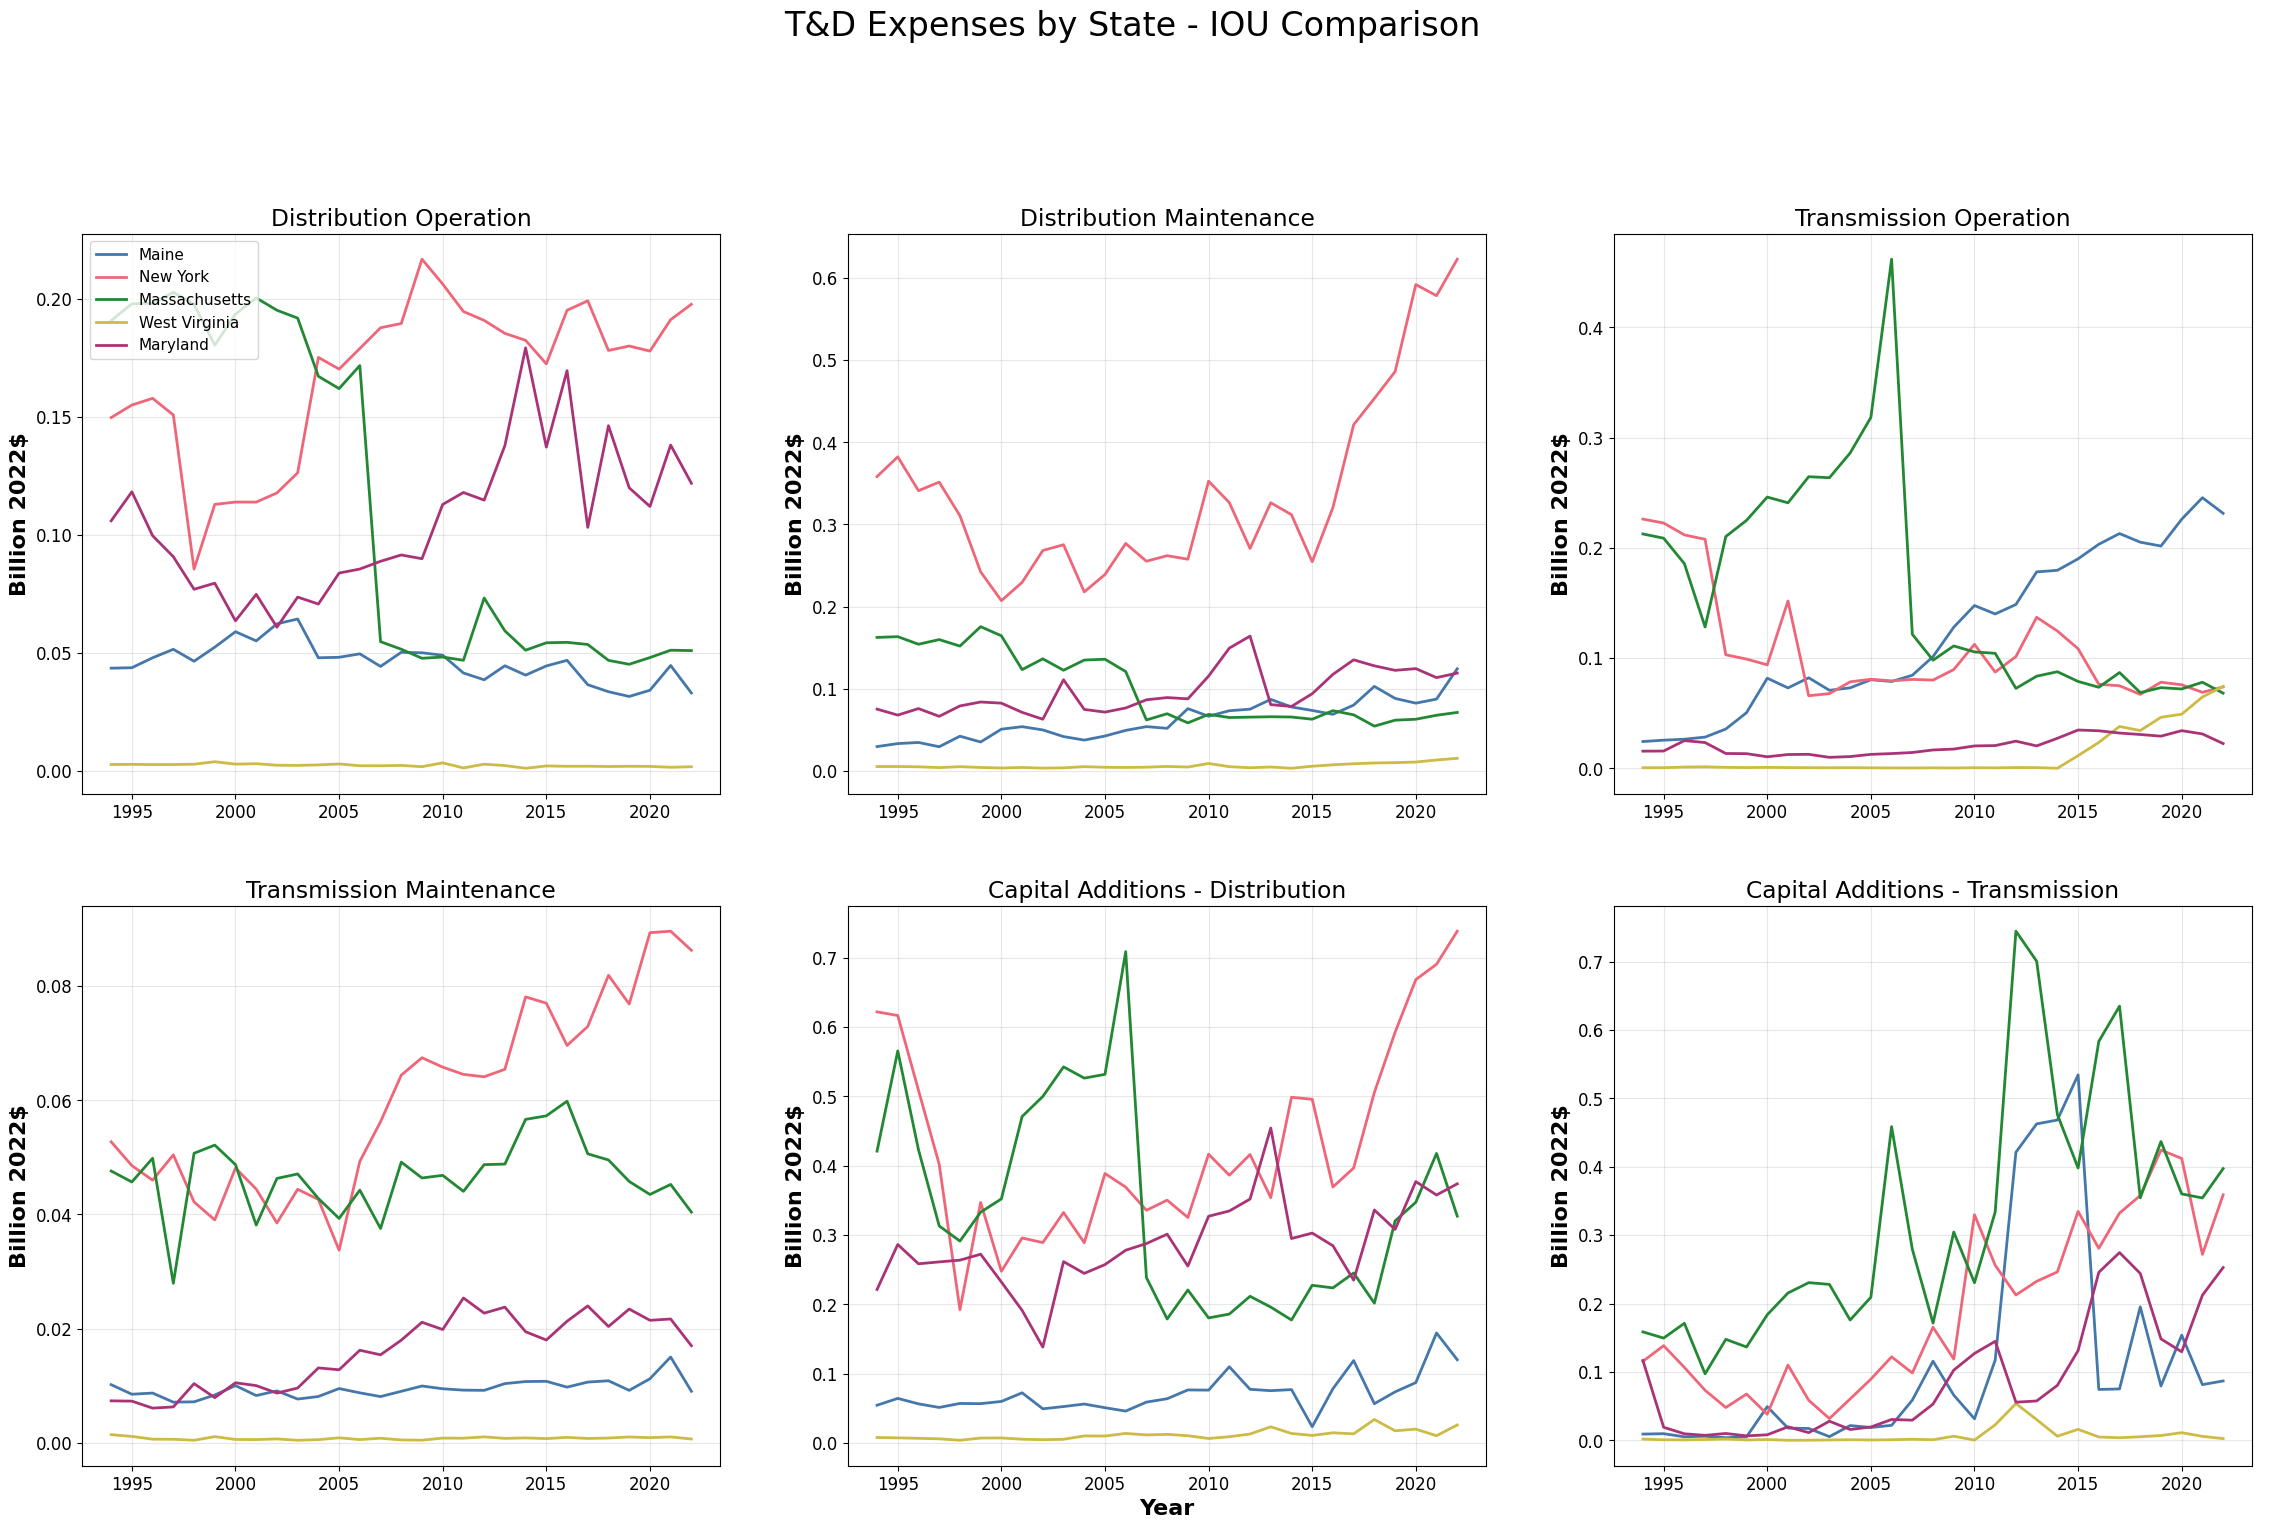

In [14]:
# Aggregate T&D expenses by state for cross-state comparison
state_ferc_agg = ferc_grouped.groupby(['state', 'report_year'])[
    [f'real_{c}' for c in available_td_cols]
].sum().reset_index()

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(28, 16))
for ax in axs.flatten():
    ax.grid(visible=True, alpha=0.3)

plot_items = [
    ('real_distribution_operation_expenses_electric', 'Distribution Operation'),
    ('real_distribution_maintenance_expense_electric', 'Distribution Maintenance'),
    ('real_transmission_operation_expense', 'Transmission Operation'),
    ('real_transmission_maintenance_expense_electric', 'Transmission Maintenance'),
    ('real_additions_distribution_plant', 'Capital Additions - Distribution'),
    ('real_additions_transmission_plant', 'Capital Additions - Transmission'),
]

for plot_idx, (col_name, title) in enumerate(plot_items):
    ax = axs[plot_idx // 3, plot_idx % 3]
    if col_name not in state_ferc_agg.columns:
        ax.set_visible(False)
        continue
    for st in TARGET_STATES:
        st_data = state_ferc_agg[state_ferc_agg['state'] == st]
        ax.plot(st_data['report_year'], st_data[col_name] / 1e9,
                label=STATE_NAMES[st], color=STATE_COLORS[st], linewidth=2)
    ax.set_title(title)
    ax.set_ylabel('Billion 2022$')

axs[0, 0].legend(loc='upper left')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('Year')
plt.suptitle('T&D Expenses by State - IOU Comparison', fontsize=24, y=1.02)

fig.savefig('HighCostStates_Outputs/Fig5_CrossState_TD_Expenses.png', dpi=300, bbox_inches='tight')
plt.show()

# Export Clean Data

In [15]:
# Export clean EIA data summary
state_ts_total.to_csv('HighCostStates_Outputs/EIA_state_level_timeseries.csv', index=False)
print('Exported EIA state-level time series')

# Export per-utility data
all_eia.to_csv('HighCostStates_Outputs/EIA_all_IOUs_by_utility.csv', index=False)
print('Exported EIA per-utility data')

Exported EIA state-level time series
Exported EIA per-utility data


In [16]:
# Export clean FERC data
clean_ferc = ferc_grouped[['state', 'utility_name_ferc1', 'report_year'] +
                          [f'real_{c}' for c in available_td_cols]].copy()
clean_ferc.columns = ['State', 'Utility Name', 'Year'] + [
    col.replace('real_', '').replace('_', ' ').title() + ' (2022$)'
    for col in [f'real_{c}' for c in available_td_cols]
]
clean_ferc.to_csv('HighCostStates_Outputs/FERC1_TD_expenses_high_cost_states.csv', index=False)
print('Exported FERC T&D expense data')
print(f'States: {clean_ferc["State"].unique()}')
print(f'Utilities: {clean_ferc["Utility Name"].nunique()}')

Exported FERC T&D expense data
States: <StringArray>
['MA', 'MD', 'ME', 'NY', 'WV']
Length: 5, dtype: str
Utilities: 27
